In [167]:
# Course : CS 513 - Knowledge Discovery and Data Mining
# Group Members: Branden Bulatao, Joseph Faustino, Natalie Fortes, Isabel Sutedjo
# Id : 20005971
# Purpose : Music Happiness Predictor - Predicts the happiness of music tracks based on various features.

# Main Author: Branden Bulatao

In [168]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Import dataset
df = pd.read_csv("./dataset.csv")

df.drop(
    df.columns[df.columns.str.contains("unnamed", case=False)], axis=1, inplace=True
)  # drop unnamed column

df.dropna(inplace=True)  # drop rows with null values

df["valence"] = df["valence"].astype("category")
df["valence"] = df["valence"].map(
    lambda x: 0 if x < 0.5 else 1
)  # sets valence to 0 if sad, 1 if happy

# Convert 'explicit' boolean to integer (0/1)
df["explicit"] = df["explicit"].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(
    df, columns=["key", "time_signature", "track_genre"], drop_first=True
)

# X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'valence'], axis=1)
X = df.drop(["track_id", "artists", "album_name", "track_name", "valence"], axis=1)
y = df["valence"]

# Normalize data
# scalar = MinMaxScaler()
# X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)

# Identify numeric features to scale
numeric_features = [
    "popularity",
    "duration_ms",
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "tempo",
]

# All other features (binary or one-hot) are left as-is
non_scaled_features = [col for col in X.columns if col not in numeric_features]

# ColumnTransformer for selective scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numeric_features),
        ("pass", "passthrough", non_scaled_features),
    ]
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Reconstruct a DataFrame (optional, for inspection/debugging)
X_processed = pd.DataFrame(X_processed, columns=numeric_features + non_scaled_features)


# Train the code
attr_train, attr_test, target_train, target_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(df.head(1))

target_train.head()
# attr_train.head()
target_test.head()

                 track_id      artists album_name track_name  popularity  \
0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy          73   

   duration_ms  explicit  danceability  energy  loudness  ...  \
0       230666         0         0.676   0.461    -6.746  ...   

   track_genre_spanish  track_genre_study  track_genre_swedish  \
0                False              False                False   

   track_genre_synth-pop  track_genre_tango  track_genre_techno  \
0                  False              False               False   

   track_genre_trance  track_genre_trip-hop  track_genre_turkish  \
0               False                 False                False   

   track_genre_world-music  
0                    False  

[1 rows x 145 columns]


113186    0
42819     0
59311     0
90417     0
61000     1
Name: valence, dtype: int64

In [170]:
# K-nearest neighbors

k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    # accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test, target_pred)
    print(f"Accuracy of model with k = {k}: {accuracy}")
    print("")

knn.n_features_in_

Accuracy of model with k = 3: 0.7289766081871345

Accuracy of model with k = 5: 0.7290350877192983

Accuracy of model with k = 10: 0.7279239766081871



140

In [171]:
# Evaluate model
accuracy = accuracy_score(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)
class_report = classification_report(target_test, target_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

test_actual = attr_test  # Copy attr_test
test_actual["target_pred"] = target_pred  # Create new column for prediction values
test_actual["test_actual"] = target_test  # Create new column for actual values
test_actual.head()  # Show table

misclassified = (
    test_actual["target_pred"] != test_actual["test_actual"]
).sum()  # Calculate number of misclassified cases
total_tests = len(test_actual)  # total number of cases

error_rate = misclassified / total_tests

# Error rate percentage
print(f"Error rate: {error_rate:.2%}")

Accuracy: 0.7279

Confusion Matrix:
 [[14608  3963]
 [ 5342 10287]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76     18571
           1       0.72      0.66      0.69     15629

    accuracy                           0.73     34200
   macro avg       0.73      0.72      0.72     34200
weighted avg       0.73      0.73      0.73     34200

Error rate: 49.81%


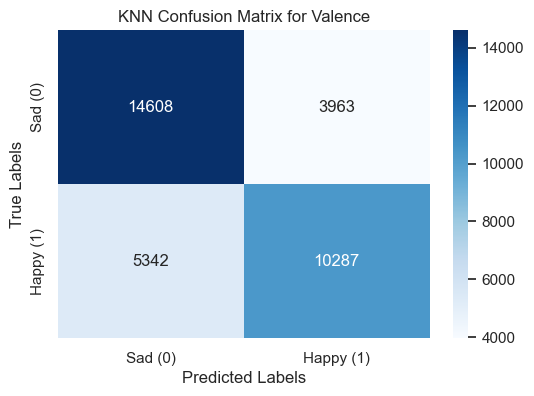

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(target_test, target_pred)

# Create the heatmap
plt.figure(figsize=(6, 4))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", ax=ax)

# Labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("KNN Confusion Matrix for Valence")
ax.xaxis.set_ticklabels(["Sad (0)", "Happy (1)"])
ax.yaxis.set_ticklabels(["Sad (0)", "Happy (1)"])

plt.show()

In [173]:
# False positives
results = pd.DataFrame(X)  # make sure this matches your data

test_actual = attr_test  # Copy attr_test
test_actual["target_pred"] = target_pred  # Create new column for prediction values
test_actual["test_actual"] = target_test  # Create new column for actual values
# test_actual.head()  # Show table

false_positives = test_actual[
    (test_actual["target_pred"] == 1) & (test_actual["test_actual"] == 0)
]

false_negatives = test_actual[
    (test_actual["target_pred"] == 0) & (test_actual["test_actual"] == 1)
]

true_positives = test_actual[
    (test_actual["target_pred"] == 1) & (test_actual["test_actual"] == 1)
]

true_negatives = test_actual[
    (test_actual["target_pred"] == 0) & (test_actual["test_actual"] == 0)
]

print(false_positives)
print(false_negatives)
# false_positives.describe()

        popularity  duration_ms  explicit  danceability  energy  loudness  \
88580         0.00     0.036664       0.0      0.797970   0.696  0.817343   
60735         0.19     0.009757       0.0      0.924873   0.616  0.685700   
20362         0.74     0.040721       0.0      0.662944   0.658  0.797274   
37587         0.48     0.077854       0.0      0.561421   0.732  0.819877   
7020          0.33     0.101080       0.0      0.479188   0.702  0.750347   
...            ...          ...       ...           ...     ...       ...   
53279         0.00     0.035515       0.0      0.586802   0.854  0.774467   
84333         0.56     0.012589       0.0      0.662944   0.472  0.642473   
103113        0.00     0.045181       0.0      0.646701   0.745  0.756969   
53782         0.62     0.029978       1.0      0.697462   0.915  0.891349   
41890         0.20     0.054402       0.0      0.367513   0.668  0.739008   

        mode  speechiness  acousticness  instrumentalness  ...  \
88580    

In [174]:
# Code given from the ML02_EDA.ipynb
# Summarize each column
summary_p = false_positives.describe().loc[["min", "max", "mean"]]
summary_n = false_negatives.describe().loc[["min", "max", "mean"]]

# Print the summary
print(summary_p)
print(summary_n)

print("\n min, max, mean only")
# Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
Min_Max_Mean = X.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)

      popularity  duration_ms  explicit  danceability    energy  loudness  \
min      0.00000     0.004465  0.000000      0.104569  0.010800  0.291789   
max      0.96000     0.185721  1.000000      0.994924  0.999000  0.922942   
mean     0.34672     0.042140  0.108884      0.595461  0.674826  0.784474   

          mode  speechiness  acousticness  instrumentalness  ...  \
min   0.000000     0.024456      0.000004          0.000000  ...   
max   1.000000     0.972021      1.000000          0.976000  ...   
mean  0.637055     0.088802      0.241038          0.079566  ...   

      track_genre_swedish  track_genre_synth-pop  track_genre_tango  \
min              0.000000               0.000000           0.000000   
max              1.000000               1.000000           1.000000   
mean             0.007605               0.006222           0.006222   

      track_genre_techno  track_genre_trance  track_genre_trip-hop  \
min             0.000000            0.000000              0.000

In [175]:
print("False Negatives Summary vs Full Dataset:")
print(false_negatives.describe().loc[["mean"]])
print("\nFull Dataset:")
print(df.describe().loc[["mean"]])

delta_n = false_negatives.describe().loc["mean"] - df.describe().loc["mean"]
print("\nDifference in Mean (False Negatives - Full Dataset):")
print(delta_n)

delta_p = false_positives.describe().loc["mean"] - df.describe().loc["mean"]
print("\nDifference in Mean (False Positives - Full Dataset):")
print(delta_p)

False Negatives Summary vs Full Dataset:
      popularity  duration_ms  explicit  danceability    energy  loudness  \
mean    0.347736     0.040596  0.111514      0.615101  0.669362  0.772001   

          mode  speechiness  acousticness  instrumentalness  ...  \
mean  0.602806     0.099362      0.293692          0.138764  ...   

      track_genre_swedish  track_genre_synth-pop  track_genre_tango  \
mean             0.004112               0.003387           0.004596   

      track_genre_techno  track_genre_trance  track_genre_trip-hop  \
mean            0.004112            0.001935              0.005806   

      track_genre_turkish  track_genre_world-music  target_pred  test_actual  
mean             0.005322                 0.002661          0.0          1.0  

[1 rows x 142 columns]

Full Dataset:
      popularity    duration_ms  explicit  danceability    energy  loudness  \
mean   33.238827  228031.153387  0.085501      0.566801  0.641383  -8.25895   

          mode  speechiness

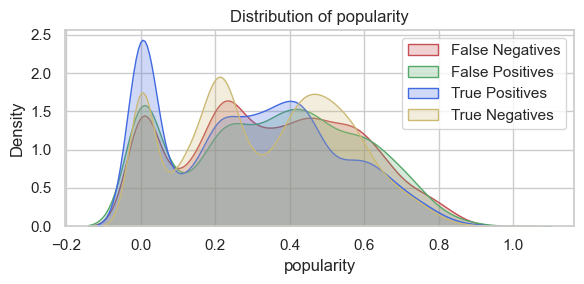

Stats for 'popularity':
  False Negatives - mean: 0.3477, std: 0.2265
  False Positives - mean: 0.3467, std: 0.2320
  True Positives  - mean: 0.2981, std: 0.2257
  True Negatives  - mean: 0.3296, std: 0.2152
------------------------------------------------------------


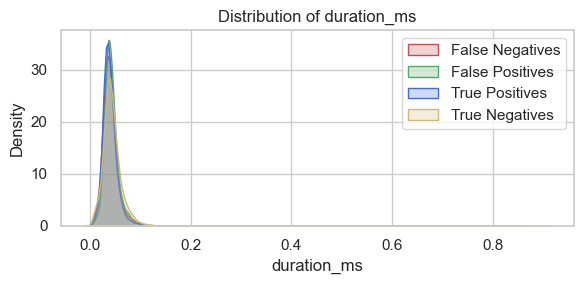

Stats for 'duration_ms':
  False Negatives - mean: 0.0406, std: 0.0232
  False Positives - mean: 0.0421, std: 0.0147
  True Positives  - mean: 0.0397, std: 0.0207
  True Negatives  - mean: 0.0444, std: 0.0237
------------------------------------------------------------


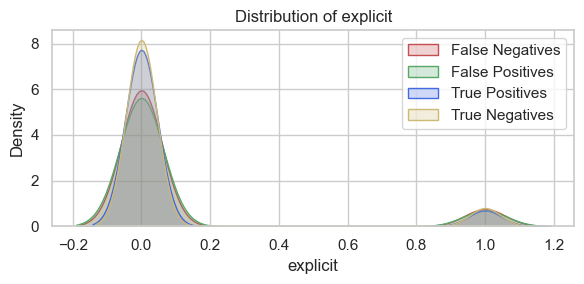

Stats for 'explicit':
  False Negatives - mean: 0.1115, std: 0.3148
  False Positives - mean: 0.1089, std: 0.3115
  True Positives  - mean: 0.0821, std: 0.2745
  True Negatives  - mean: 0.0888, std: 0.2844
------------------------------------------------------------


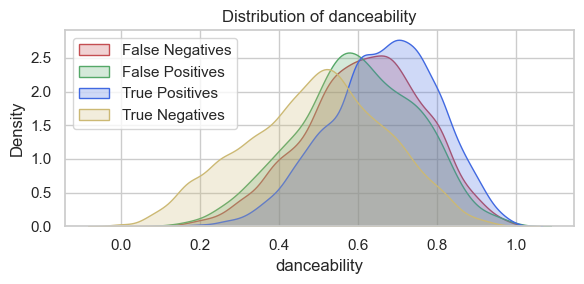

Stats for 'danceability':
  False Negatives - mean: 0.6151, std: 0.1497
  False Positives - mean: 0.5955, std: 0.1536
  True Positives  - mean: 0.6621, std: 0.1388
  True Negatives  - mean: 0.4918, std: 0.1778
------------------------------------------------------------


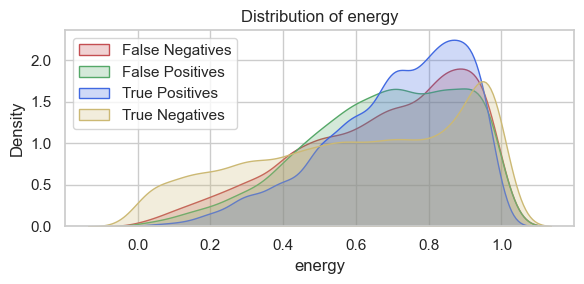

Stats for 'energy':
  False Negatives - mean: 0.6694, std: 0.2311
  False Positives - mean: 0.6748, std: 0.2124
  True Positives  - mean: 0.7085, std: 0.1910
  True Negatives  - mean: 0.6055, std: 0.2890
------------------------------------------------------------


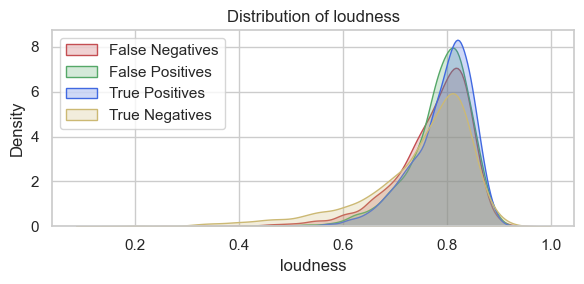

Stats for 'loudness':
  False Negatives - mean: 0.7720, std: 0.0771
  False Positives - mean: 0.7845, std: 0.0641
  True Positives  - mean: 0.7904, std: 0.0611
  True Negatives  - mean: 0.7461, std: 0.1094
------------------------------------------------------------


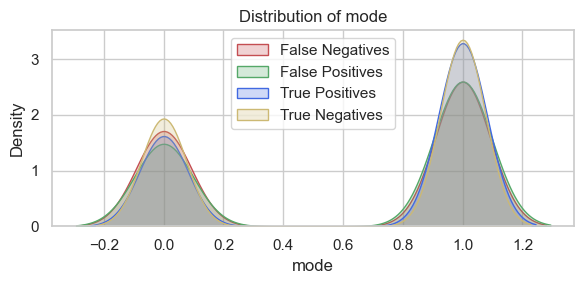

Stats for 'mode':
  False Negatives - mean: 0.6028, std: 0.4894
  False Positives - mean: 0.6371, std: 0.4809
  True Positives  - mean: 0.6699, std: 0.4703
  True Negatives  - mean: 0.6338, std: 0.4818
------------------------------------------------------------


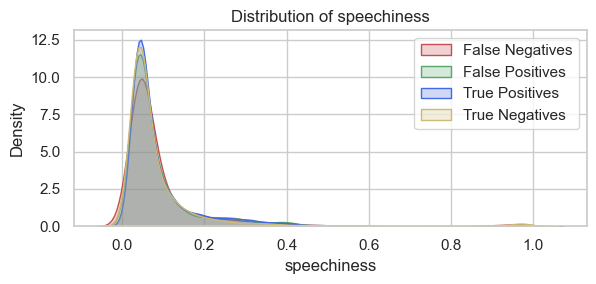

Stats for 'speechiness':
  False Negatives - mean: 0.0994, std: 0.1366
  False Positives - mean: 0.0888, std: 0.0984
  True Positives  - mean: 0.0915, std: 0.1004
  True Negatives  - mean: 0.0901, std: 0.1300
------------------------------------------------------------


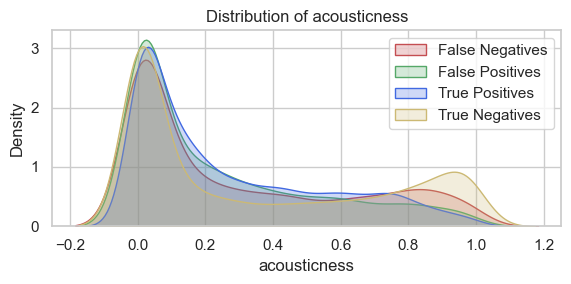

Stats for 'acousticness':
  False Negatives - mean: 0.2937, std: 0.3241
  False Positives - mean: 0.2410, std: 0.2786
  True Positives  - mean: 0.2669, std: 0.2763
  True Negatives  - mean: 0.3383, std: 0.3701
------------------------------------------------------------


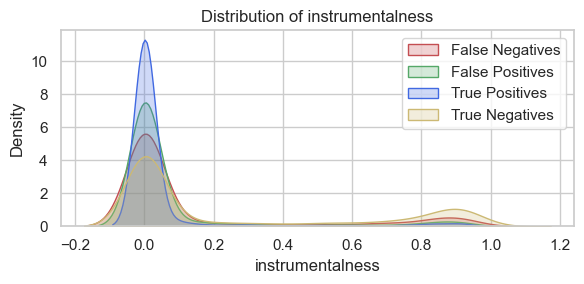

Stats for 'instrumentalness':
  False Negatives - mean: 0.1388, std: 0.2900
  False Positives - mean: 0.0796, std: 0.2172
  True Positives  - mean: 0.0526, std: 0.1788
  True Negatives  - mean: 0.2592, std: 0.3700
------------------------------------------------------------


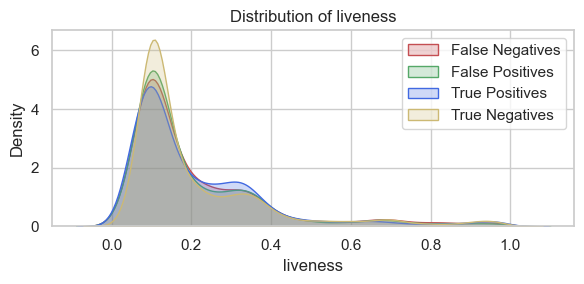

Stats for 'liveness':
  False Negatives - mean: 0.2123, std: 0.1847
  False Positives - mean: 0.2054, std: 0.1777
  True Positives  - mean: 0.2121, std: 0.1833
  True Negatives  - mean: 0.2105, std: 0.1853
------------------------------------------------------------


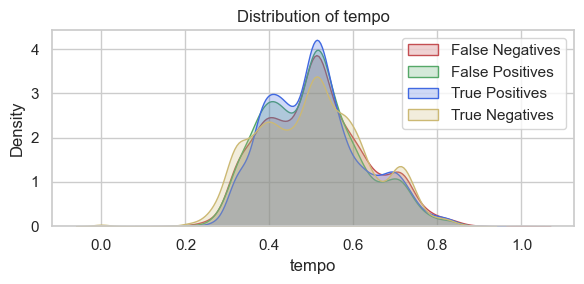

Stats for 'tempo':
  False Negatives - mean: 0.5104, std: 0.1209
  False Positives - mean: 0.5009, std: 0.1149
  True Positives  - mean: 0.5074, std: 0.1142
  True Negatives  - mean: 0.5031, std: 0.1288
------------------------------------------------------------


In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

feature_cols = [
    col
    for col in df_no_genres.columns
    if col
    not in [
        "target_actual",
        "target_pred",
        "track_id",
        "artists",
        "album_name",
        "track_name",
        "valence",
    ]
]

KF_df = df.drop(columns="valence")
for col in df_no_genres.select_dtypes(include=["float", "int"]).columns:
    if col == "valence": continue
    plt.figure(figsize=(6, 3))
    sns.kdeplot(false_negatives[col], label="False Negatives", fill=True, color="r")
    sns.kdeplot(false_positives[col], label="False Positives", fill=True, color="g")
    sns.kdeplot(true_positives[col], label="True Positives", fill=True, color="royalblue")
    sns.kdeplot(true_negatives[col], label="True Negatives", fill=True, color="y")
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Stats for '{col}':")
    print(f"  False Negatives - mean: {false_negatives[col].mean():.4f}, std: {false_negatives[col].std():.4f}")
    print(f"  False Positives - mean: {false_positives[col].mean():.4f}, std: {false_positives[col].std():.4f}")
    print(f"  True Positives  - mean: {true_positives[col].mean():.4f}, std: {true_positives[col].std():.4f}")
    print(f"  True Negatives  - mean: {true_negatives[col].mean():.4f}, std: {true_negatives[col].std():.4f}")
    print("-" * 60)


['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5']


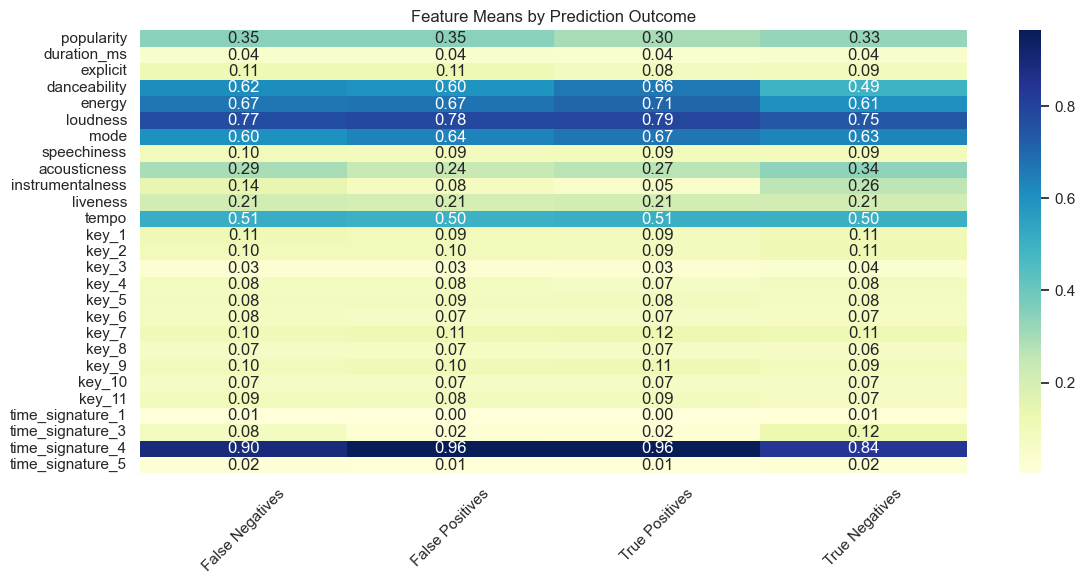

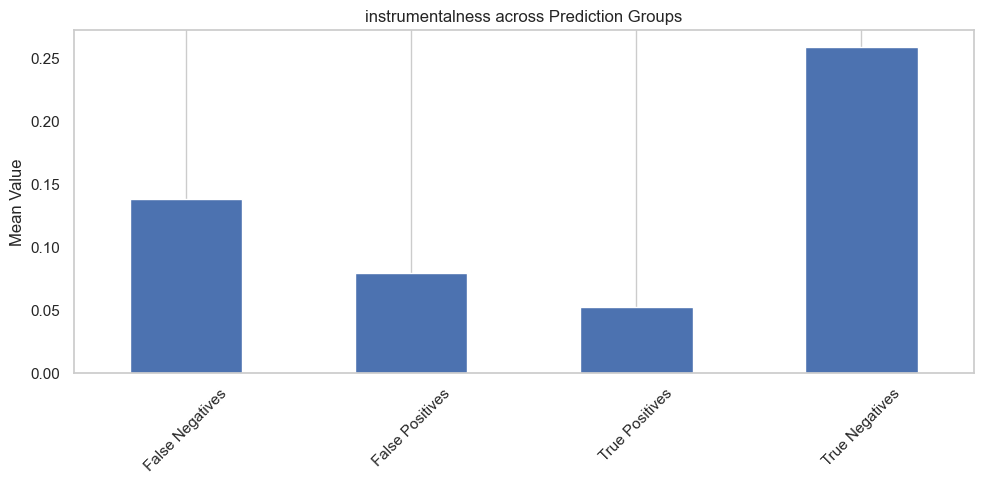

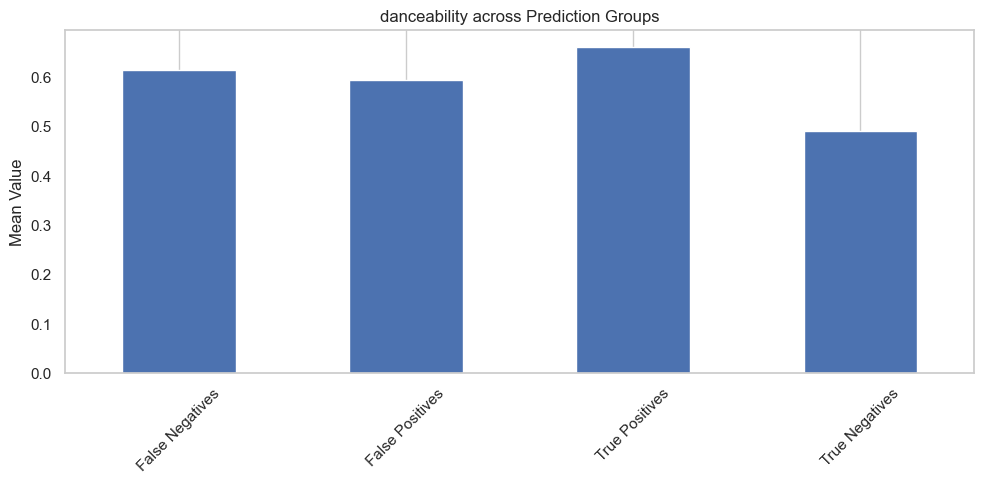

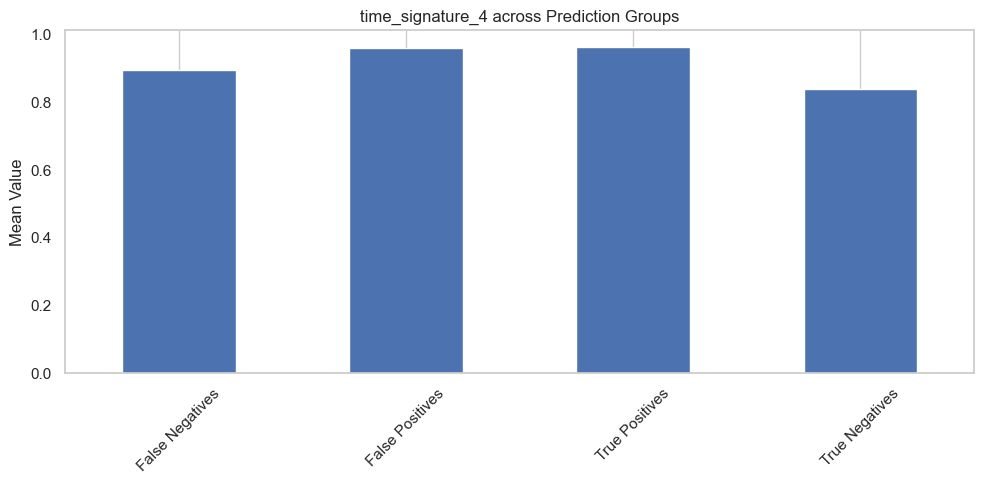

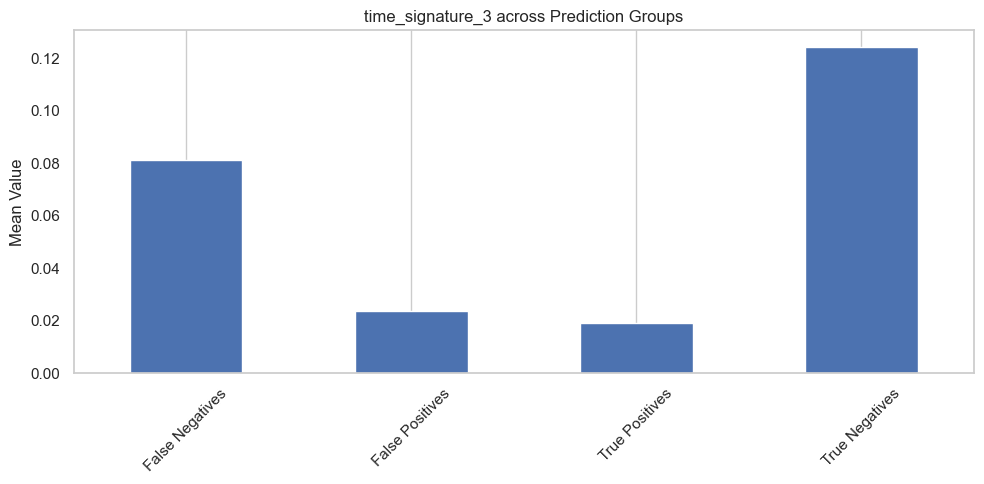

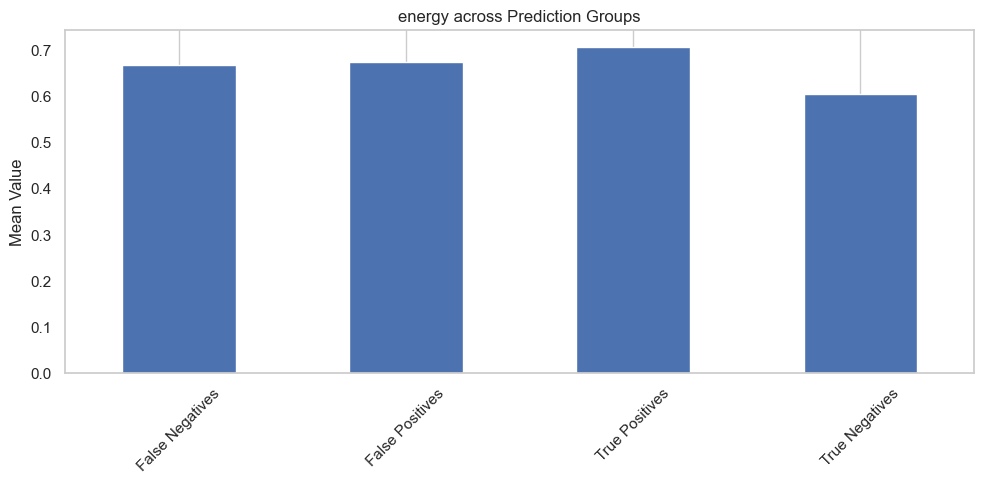

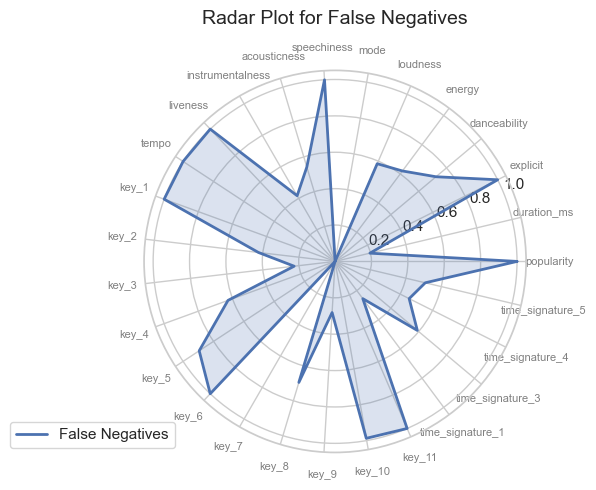

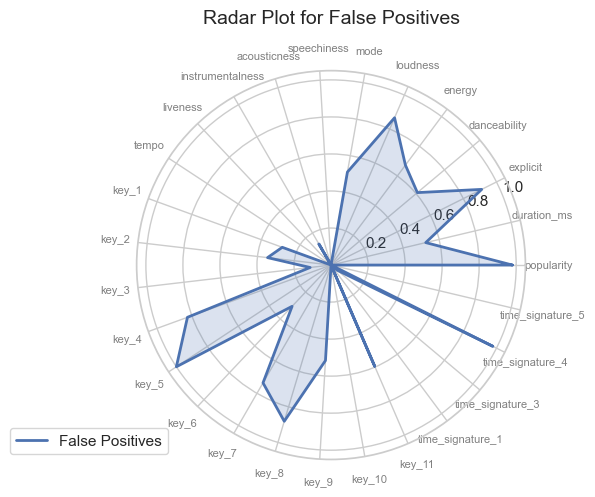

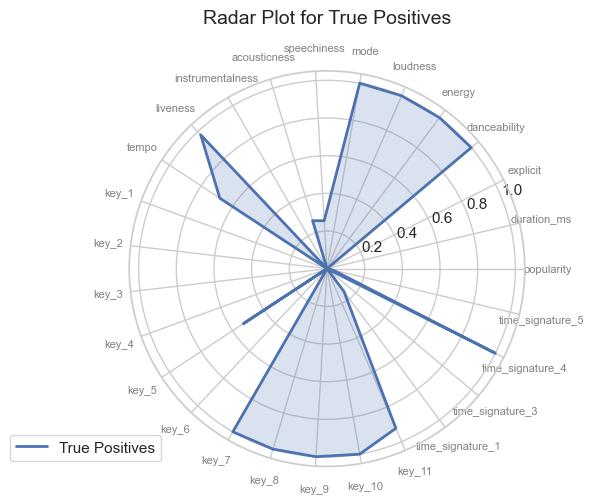

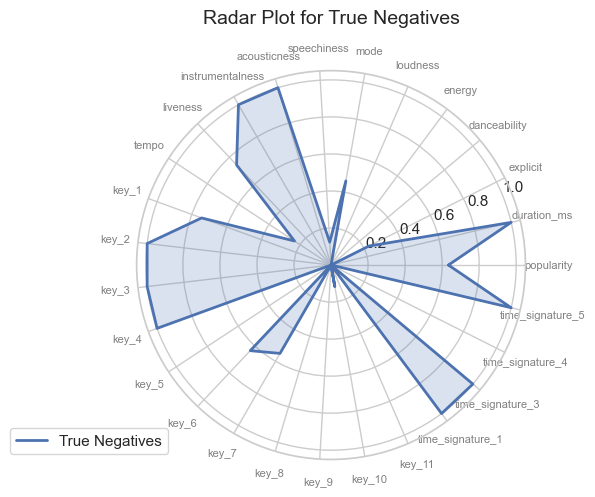

In [177]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

# Features only (adjust as needed)
feature_cols = [
    col
    for col in df_no_genres.columns
    if col
    not in [
        "target_actual",
        "target_pred",
        "track_id",
        "artists",
        "album_name",
        "track_name",
        "valence",
    ]
]

print(feature_cols)

# Mean summary per category
summary_df = pd.DataFrame(
    {
        "False Negatives": false_negatives[feature_cols].mean(),
        "False Positives": false_positives[feature_cols].mean(),
        "True Positives": true_positives[feature_cols].mean(),
        "True Negatives": true_negatives[feature_cols].mean(),
        # "All Data": df[feature_cols].mean(),
    }
)

# Transpose for easier plotting
summary_df = summary_df.T

# Optional: Normalize columns for radar/spider-style plots
summary_norm = (summary_df - summary_df.min()) / (summary_df.max() - summary_df.min())

# --- Plot 1: Heatmap of Means per Outcome Type ---
plt.figure(figsize=(12, 6))
sns.heatmap(summary_df.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Feature Means by Prediction Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Comparison Bar Plot for One Feature at a Time ---
# Choose top 5 most differing features (by std deviation across groups)
top_diff_features = summary_df.std().sort_values(ascending=False).head(5).index

for feature in top_diff_features:
    summary_df[feature].plot(
        kind="bar", title=f"{feature} across Prediction Groups", ylabel="Mean Value"
    )
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

# --- Plot 3: Radar Plot (optional, fancier) ---
try:
    from math import pi

    categories = list(summary_norm.columns)
    groups = summary_norm.index

    for group in groups:
        values = summary_norm.loc[group].tolist()
        values += values[:1]  # repeat the first value to close the circle

        angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
        angles += angles[:1]

        plt.figure(figsize=(6, 6))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories, color="grey", size=8)

        ax.plot(angles, values, linewidth=2, linestyle="solid", label=group)
        ax.fill(angles, values, alpha=0.2)

        plt.title(f"Radar Plot for {group}", size=14, y=1.1)
        plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
        plt.tight_layout()
        plt.show()
except ImportError:
    print("Radar plot skipped (requires polar plotting support).")

In [178]:
# true_positives.to_csv('true_positives.csv', index=False)

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


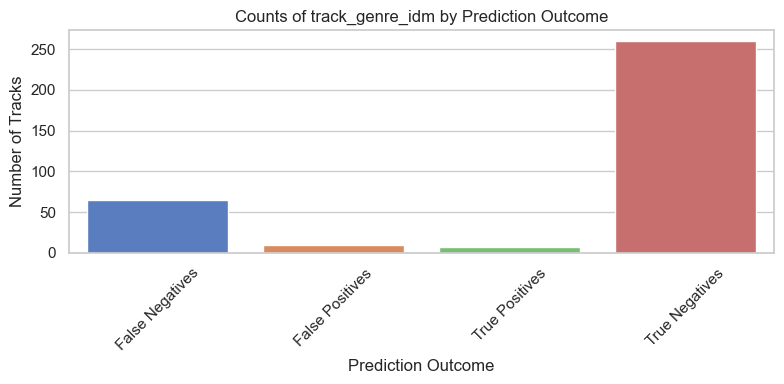

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


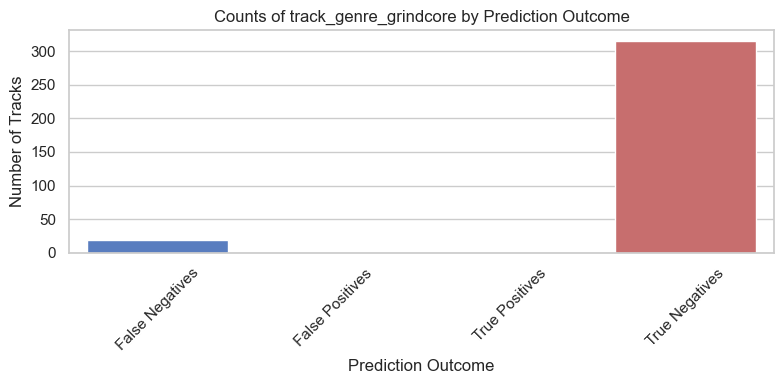

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


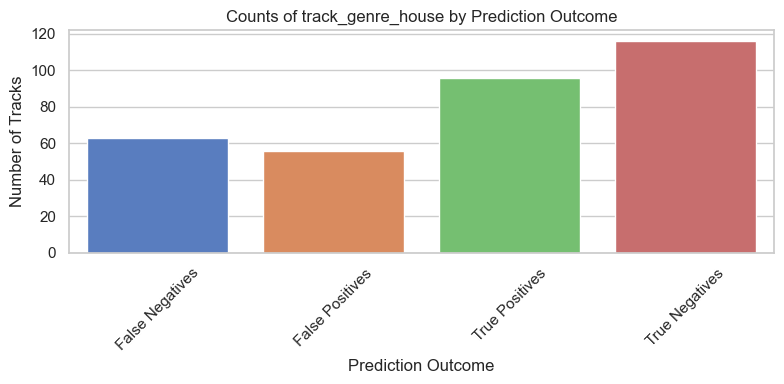

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


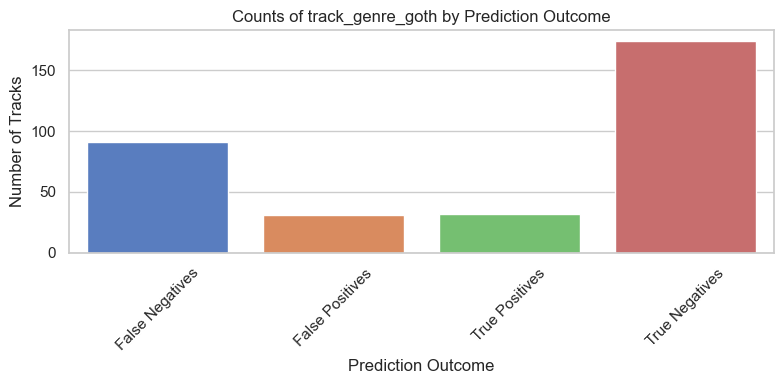

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


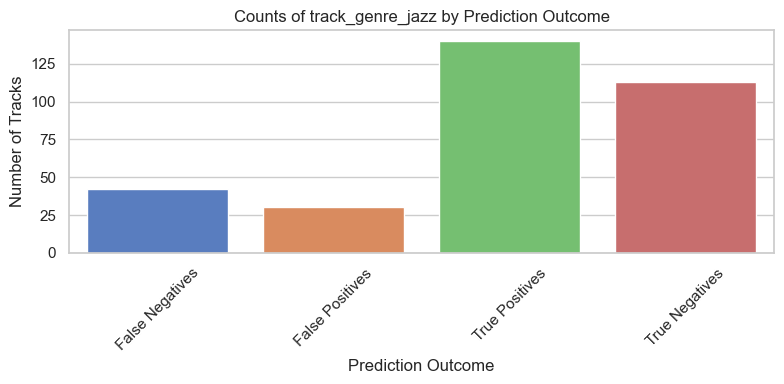

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


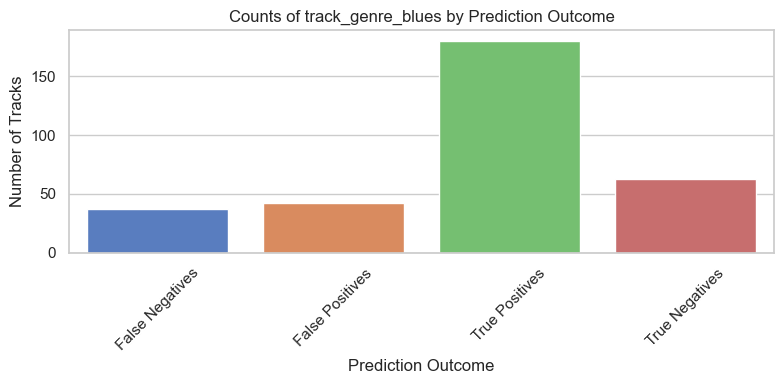

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


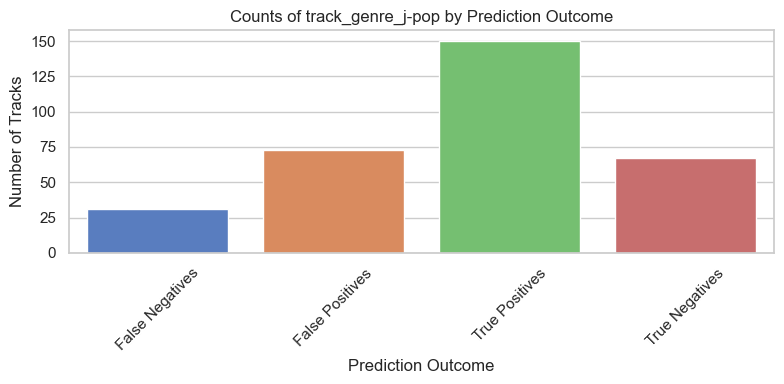

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


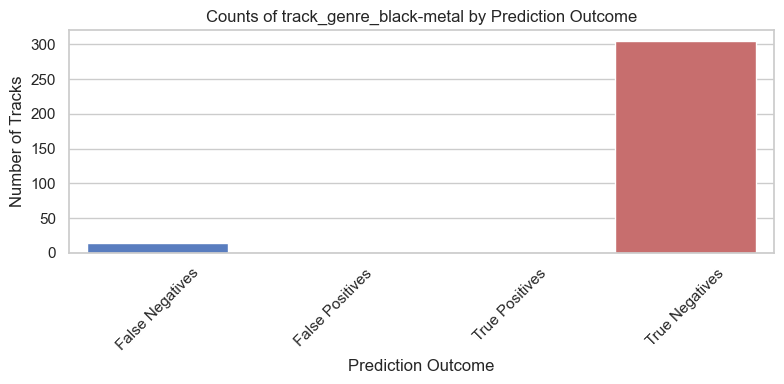

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


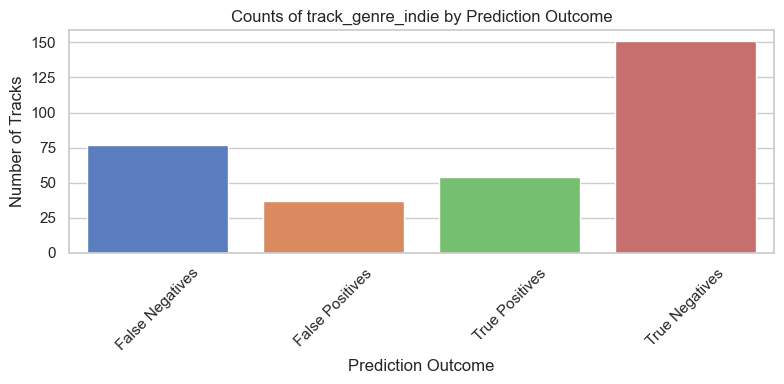

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


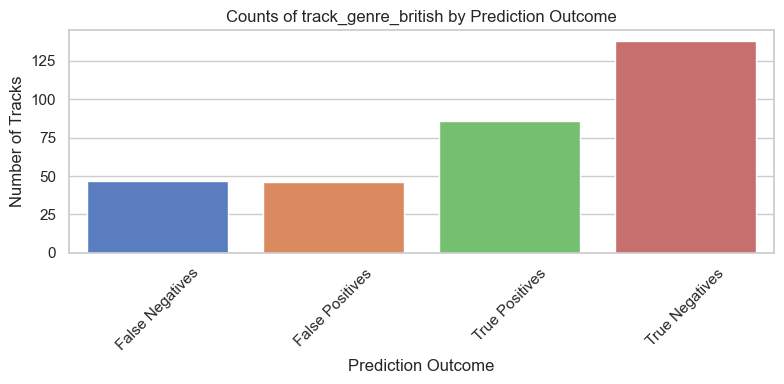

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


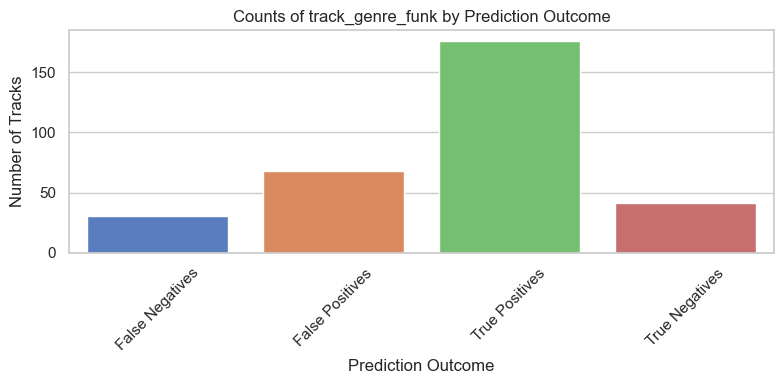

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


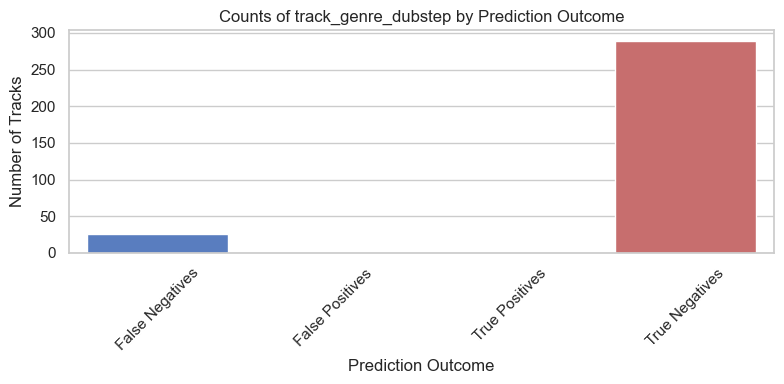

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


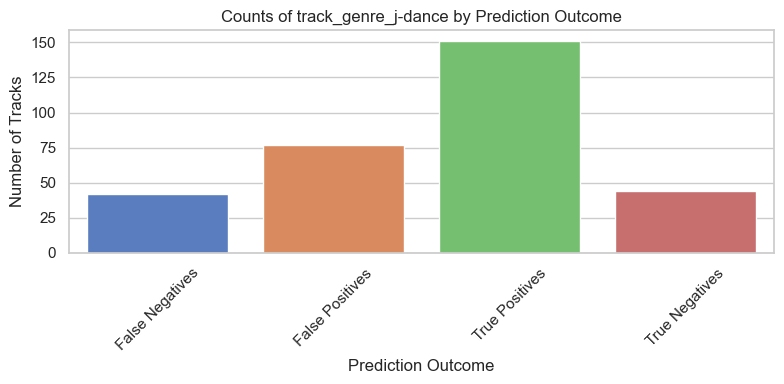

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


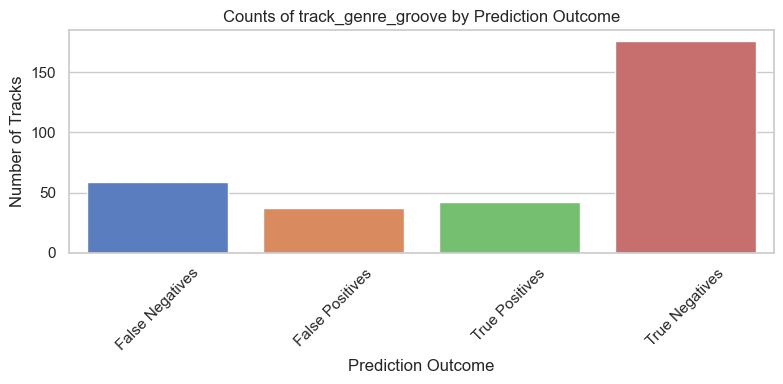

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


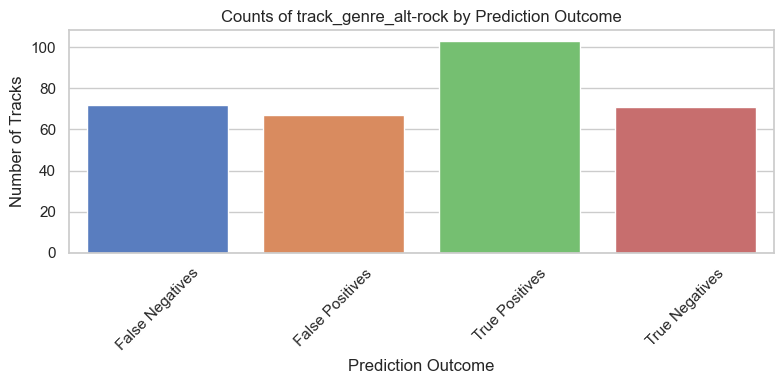

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


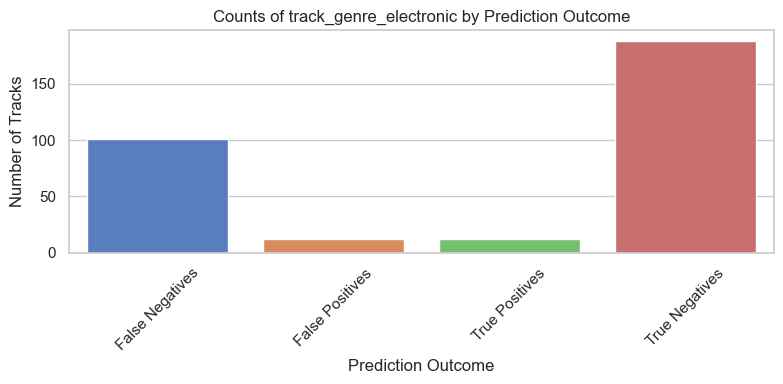

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


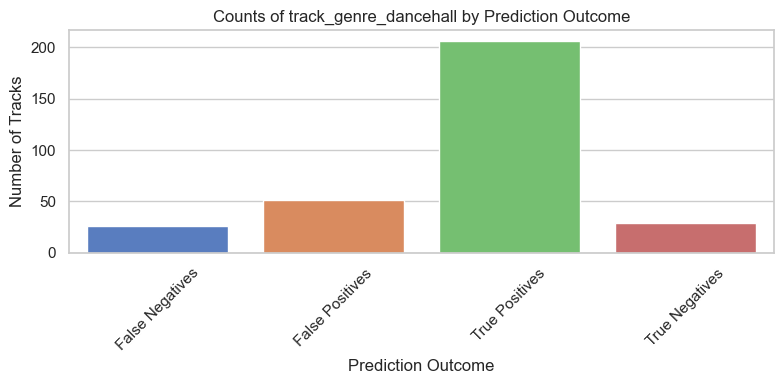

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


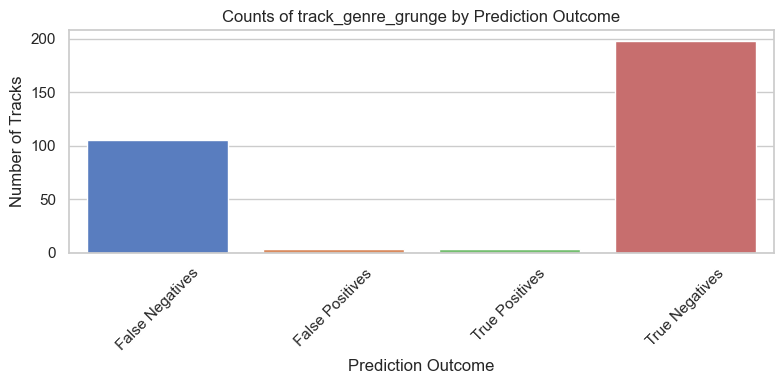

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


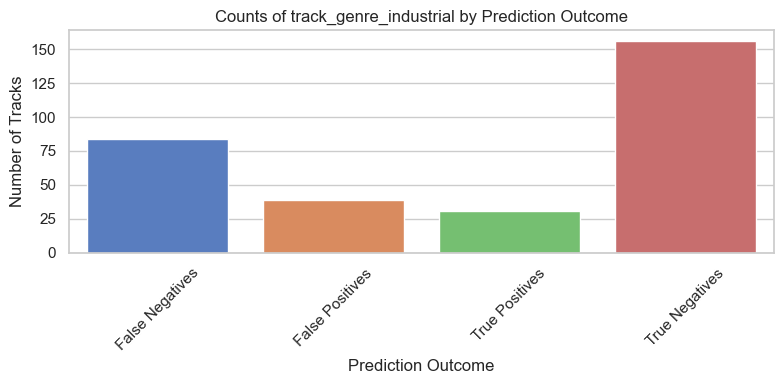

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


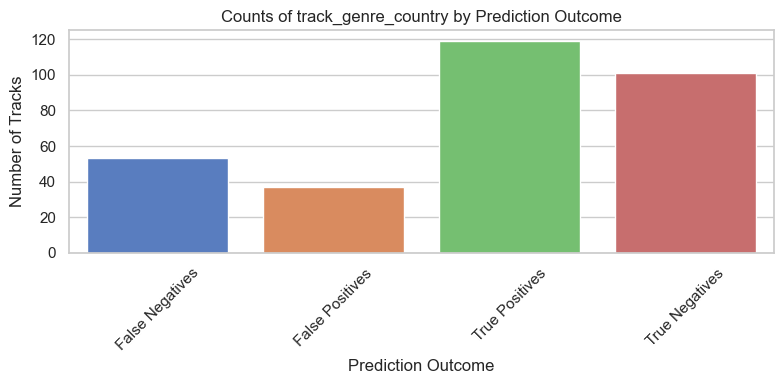

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


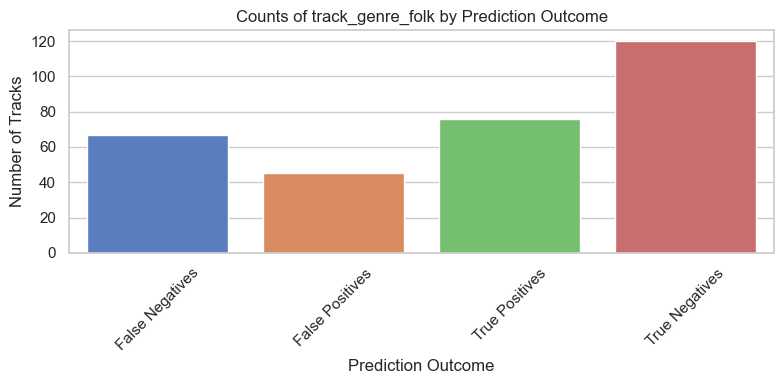

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


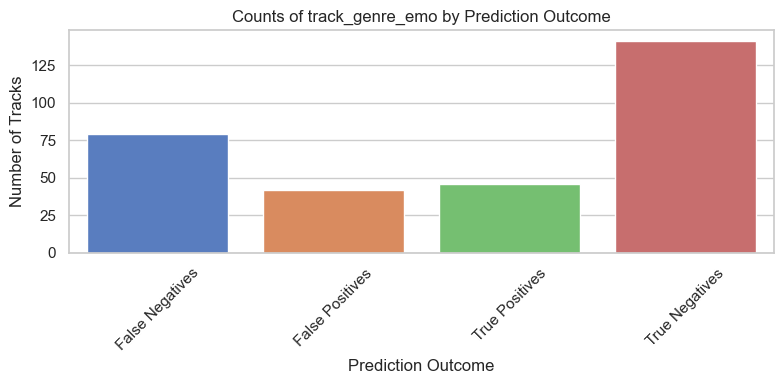

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


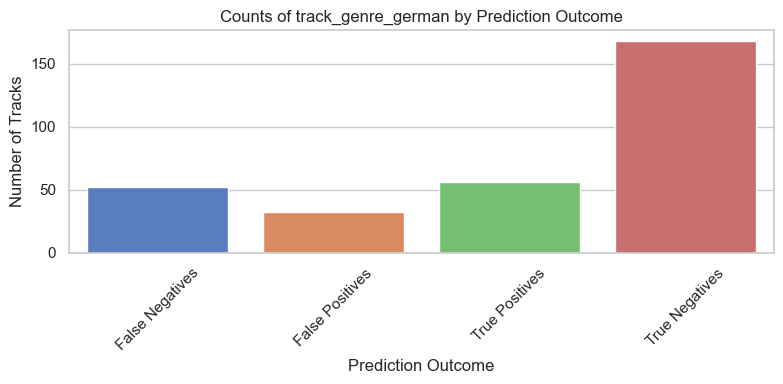

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


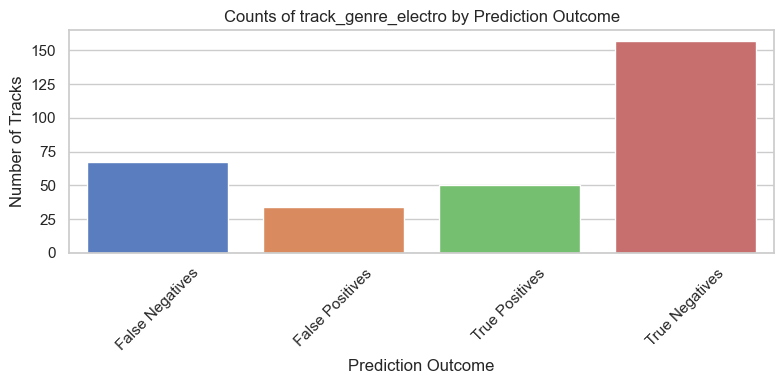

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


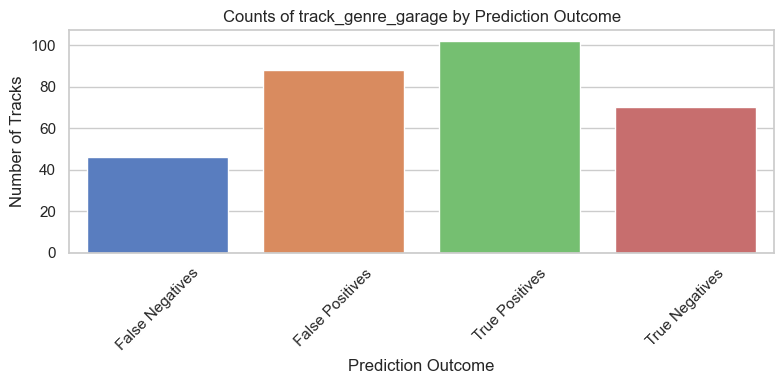

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


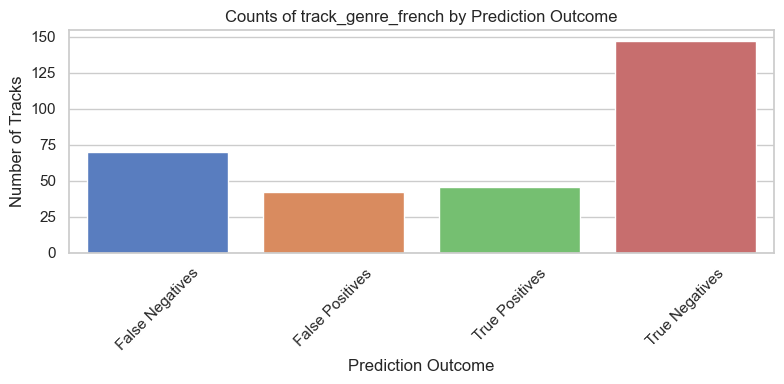

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


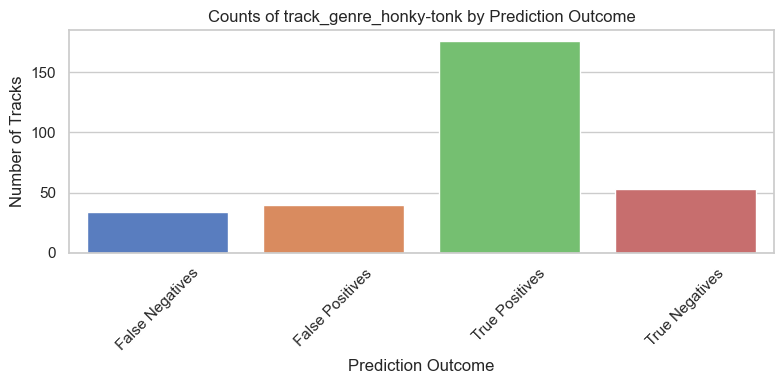

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


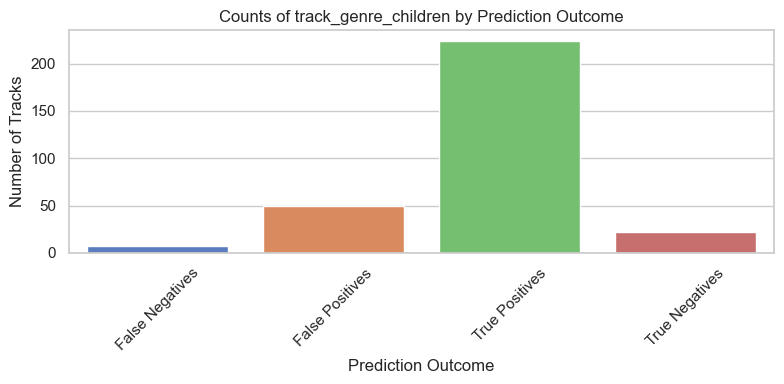

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


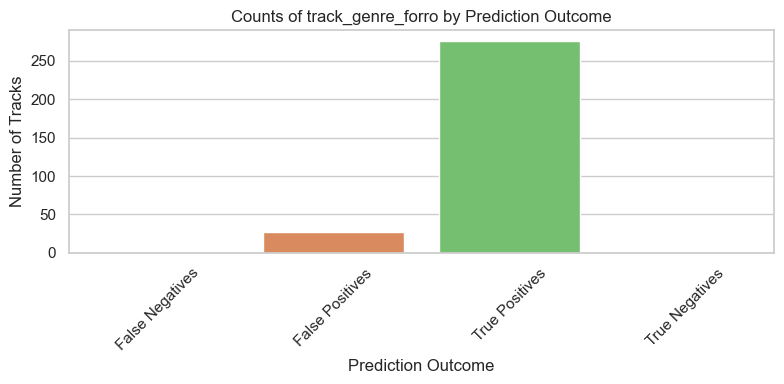

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


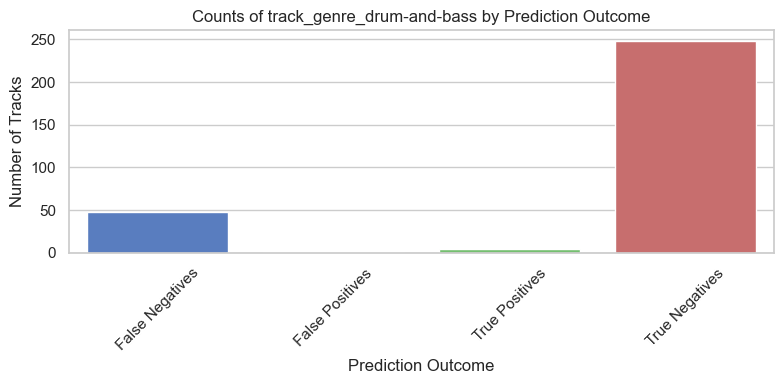

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


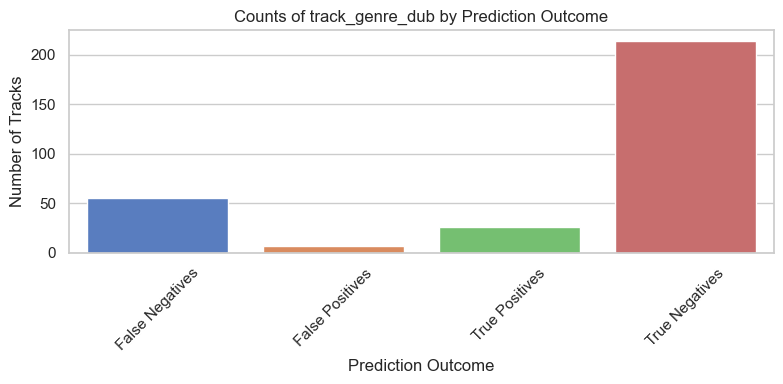

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


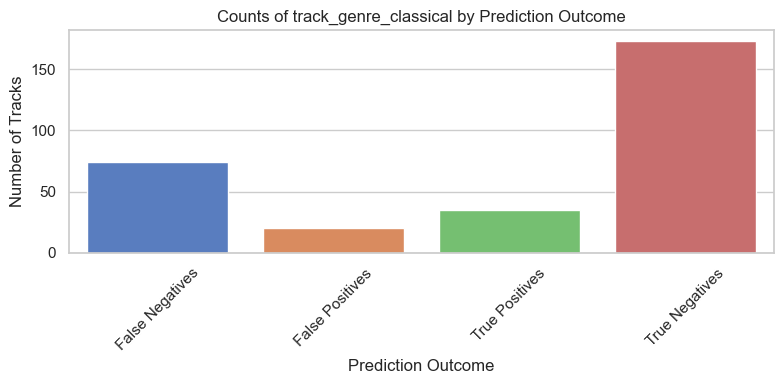

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


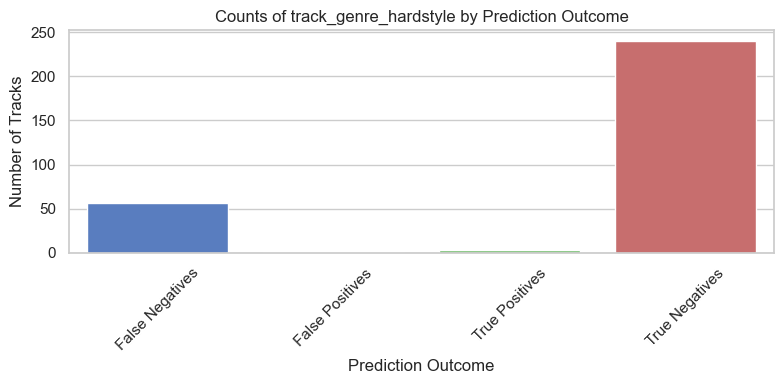

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


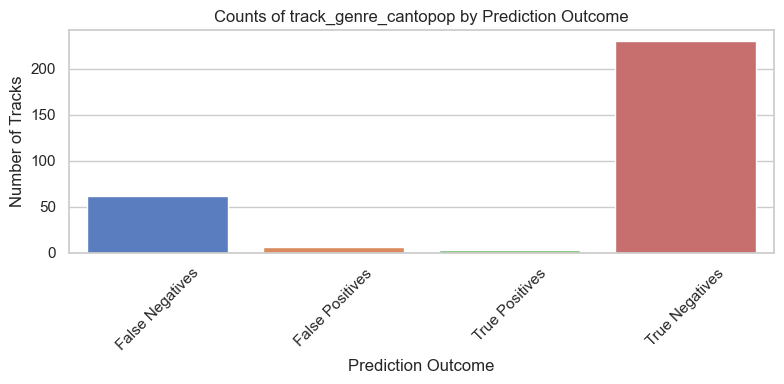

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


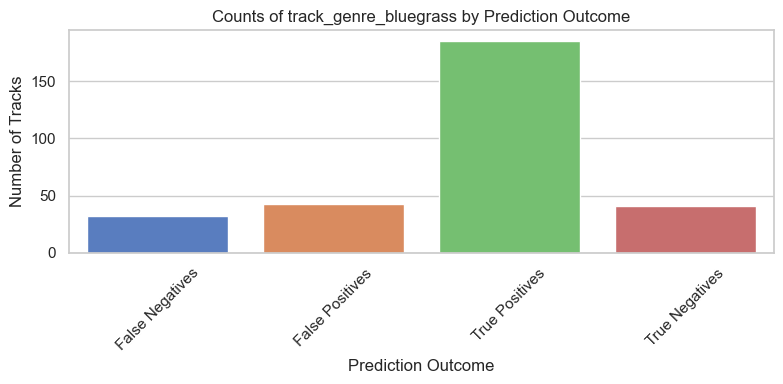

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


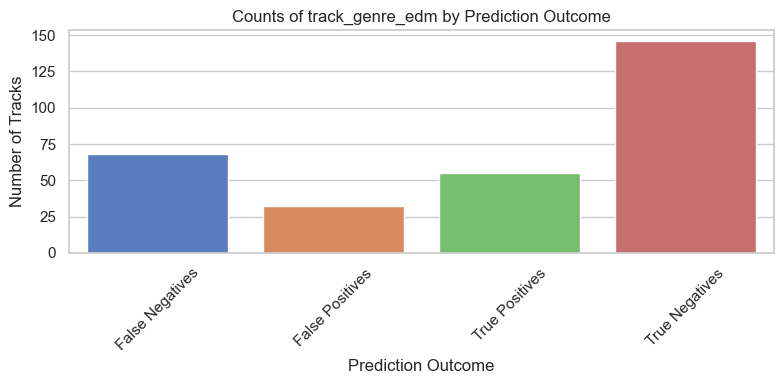

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


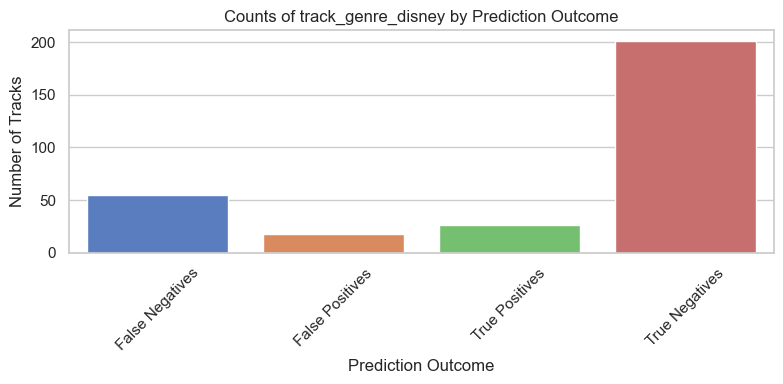

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


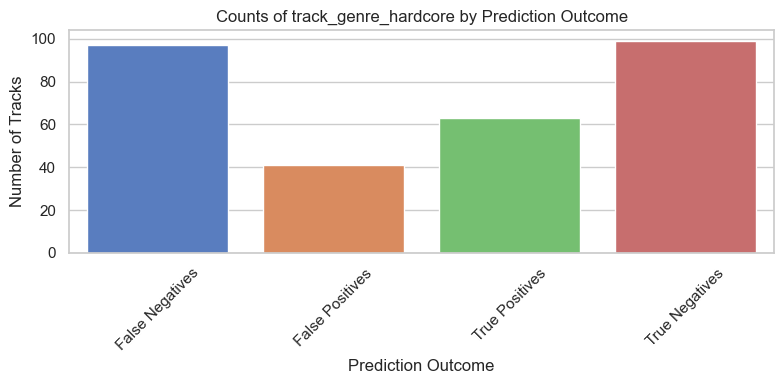

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


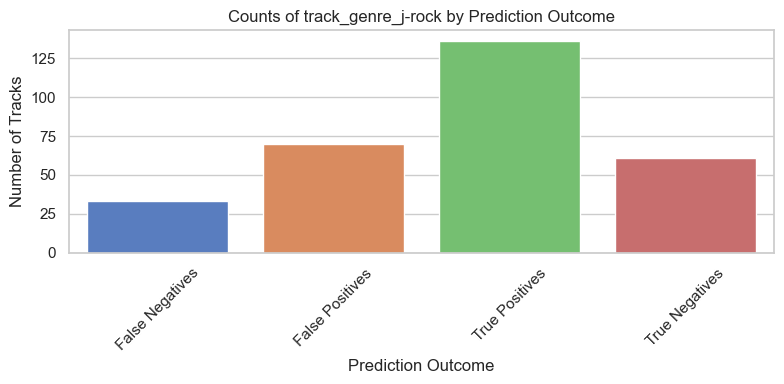

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


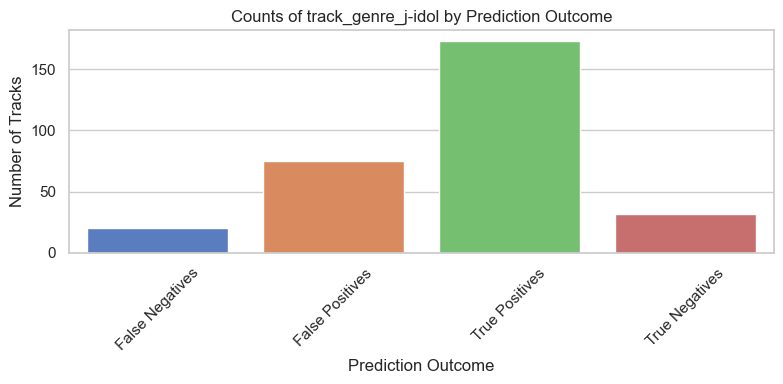

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


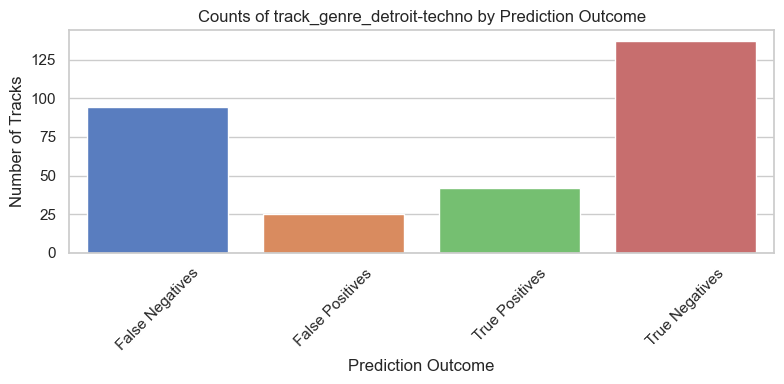

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


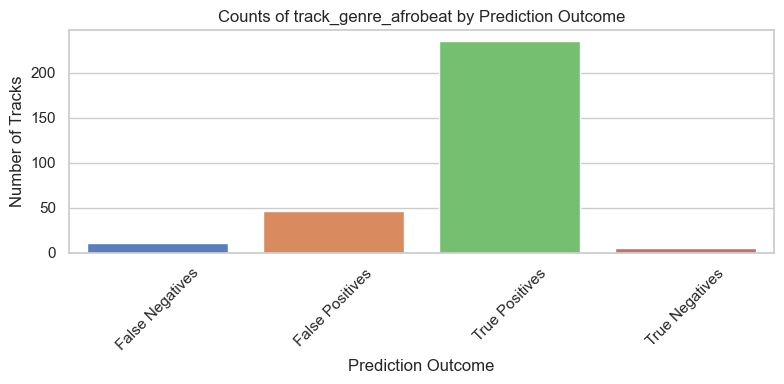

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


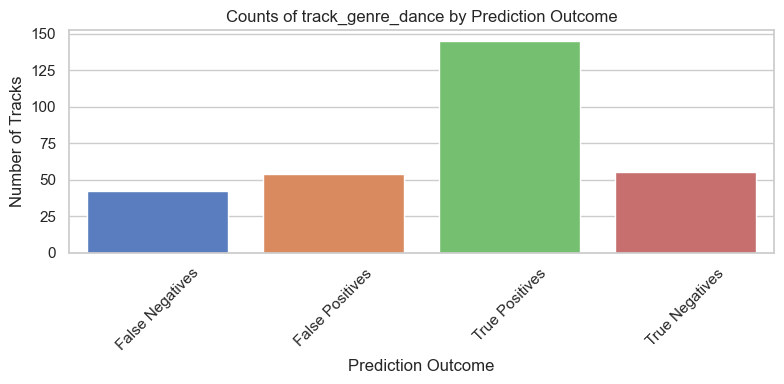

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


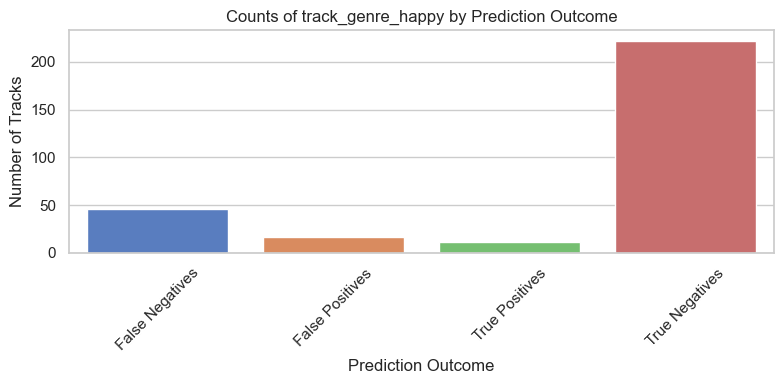

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


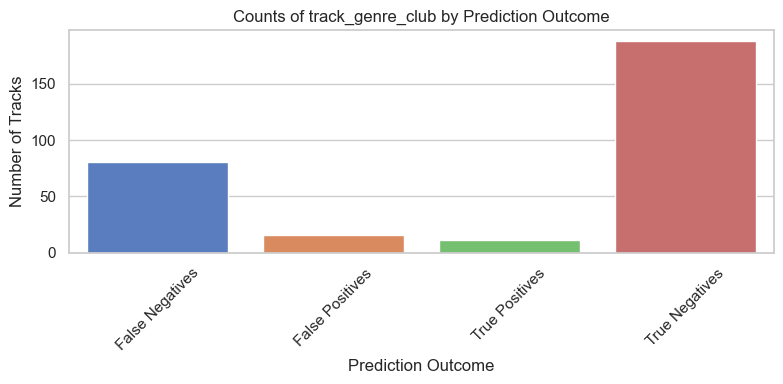

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


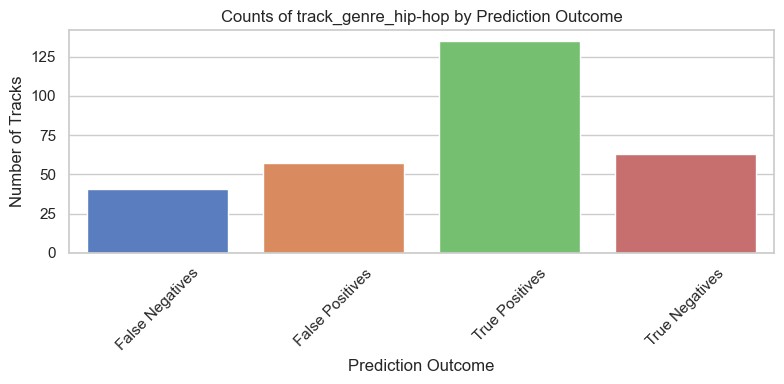

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


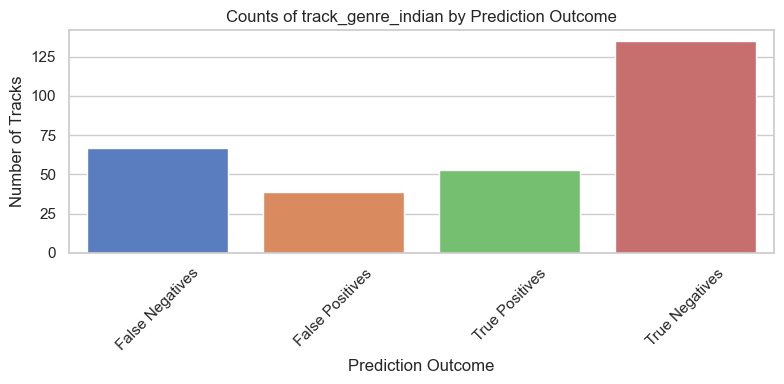

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


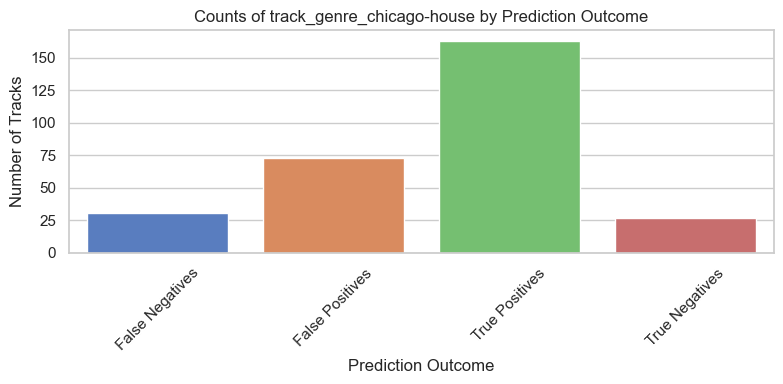

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


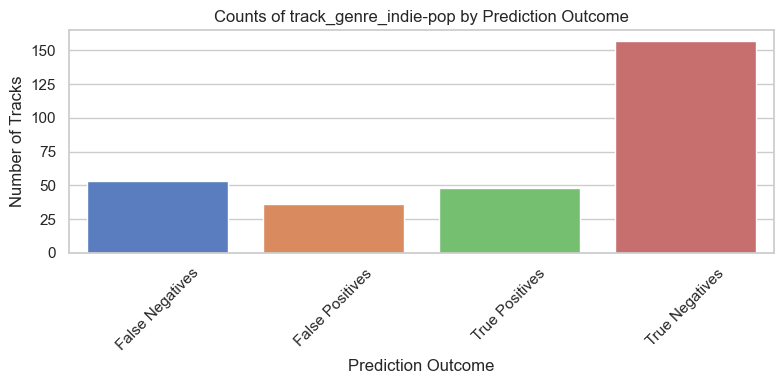

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


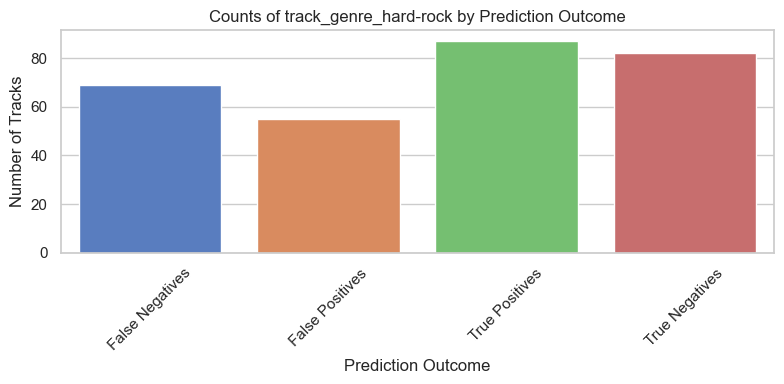

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


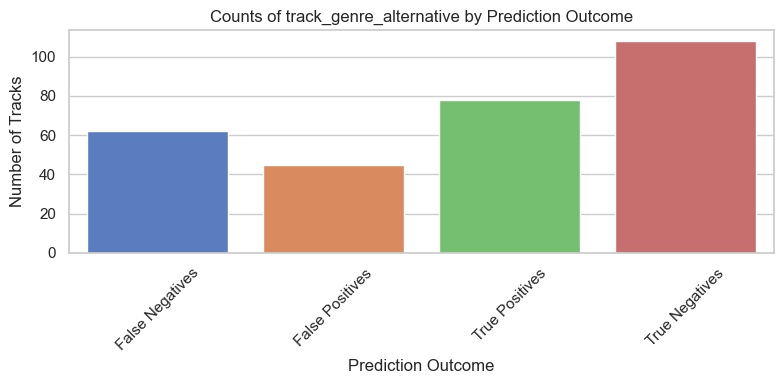

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


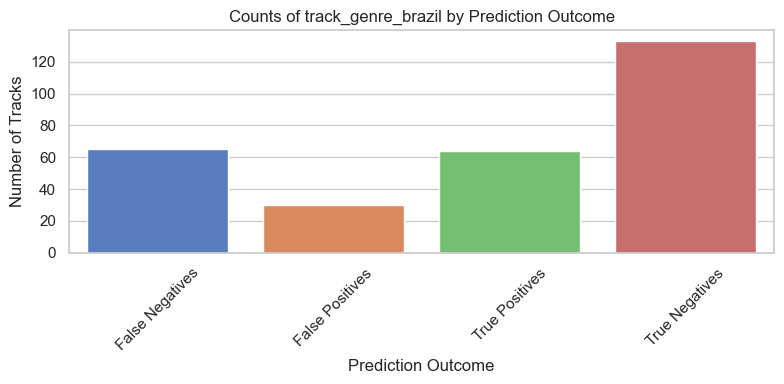

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


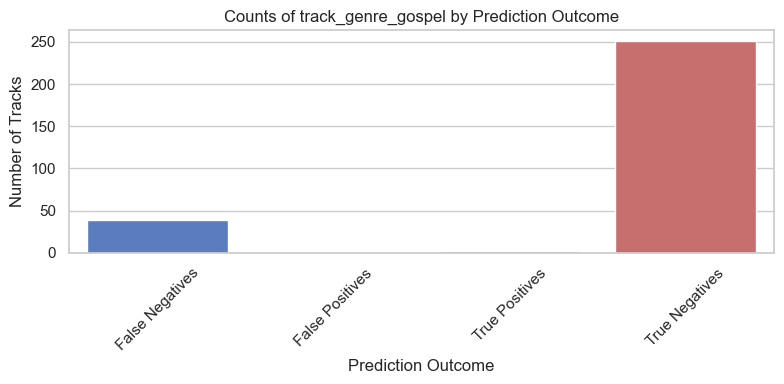

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


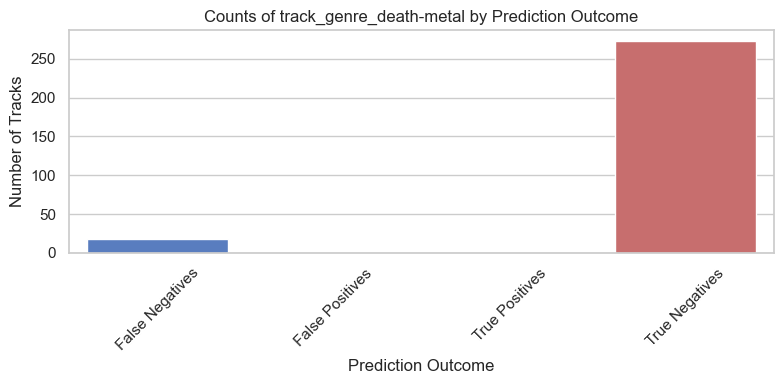

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


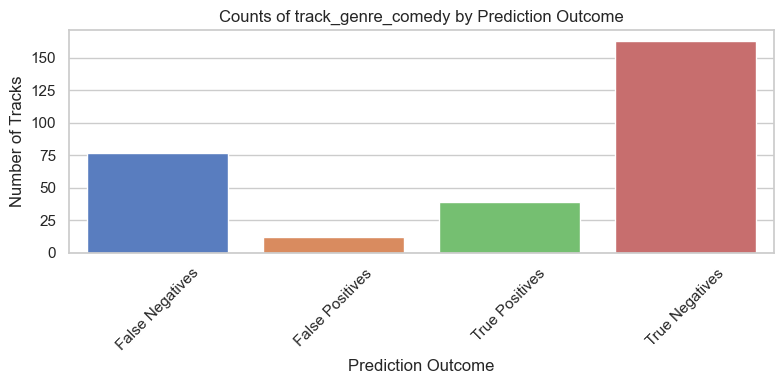

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


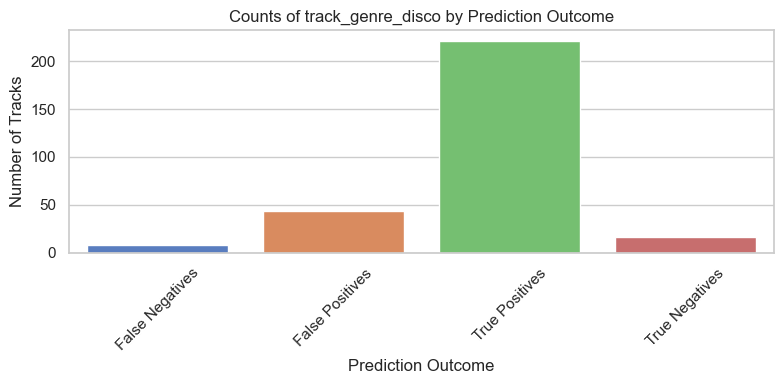

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


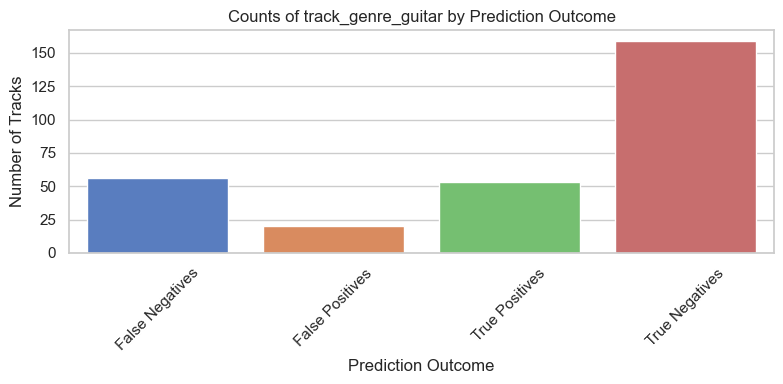

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


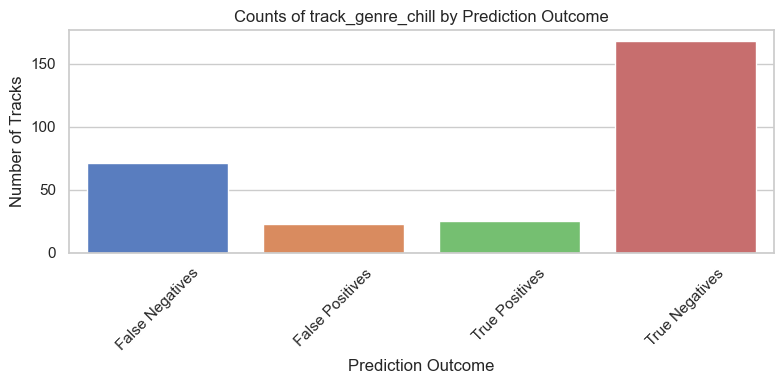

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


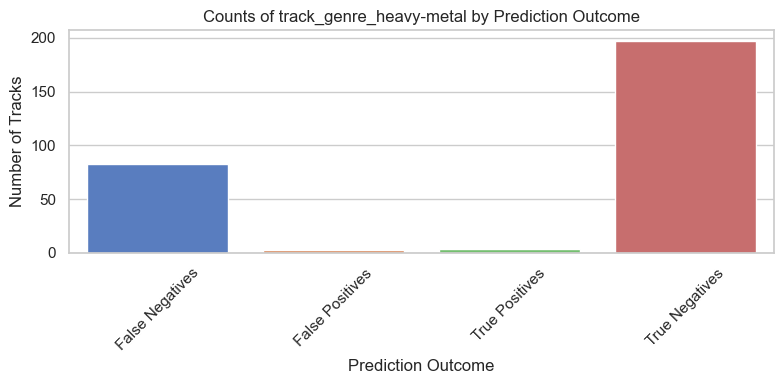

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


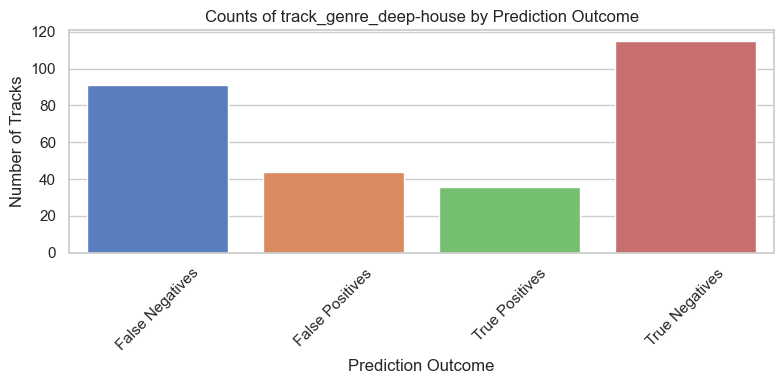

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


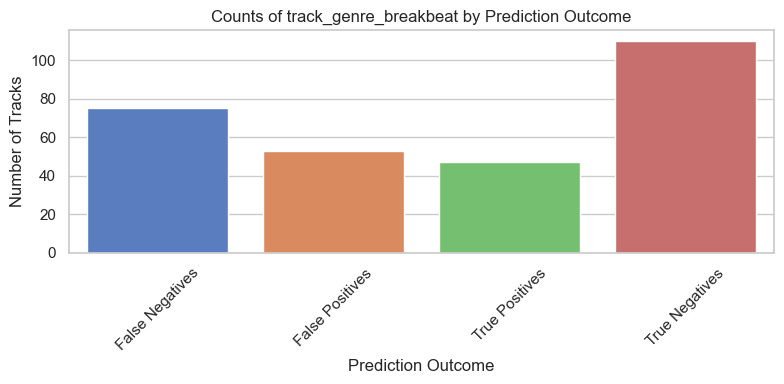

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


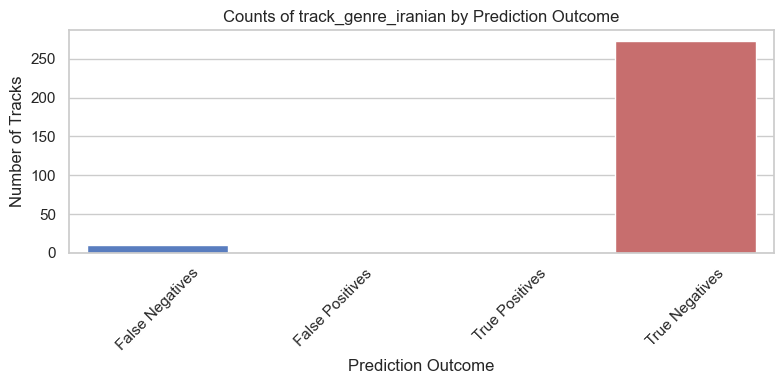

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


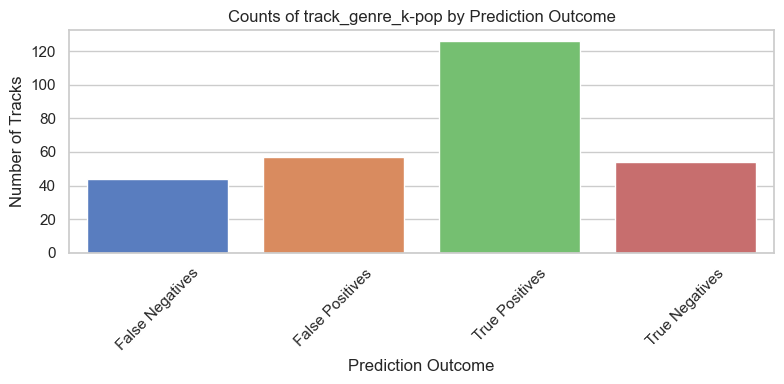

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


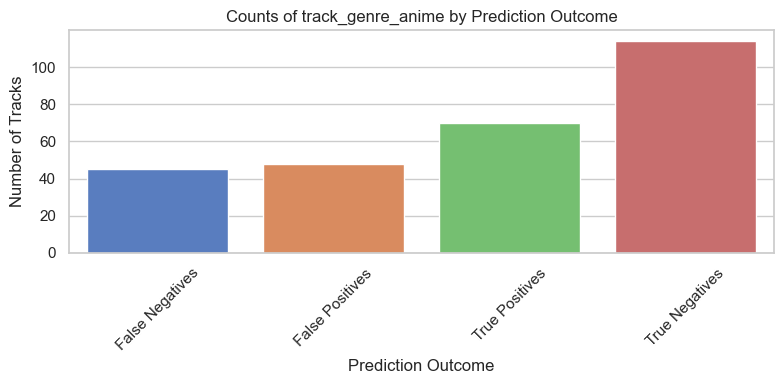

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


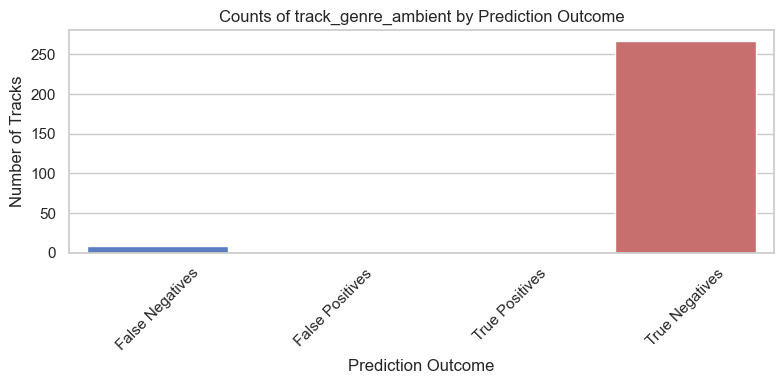

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


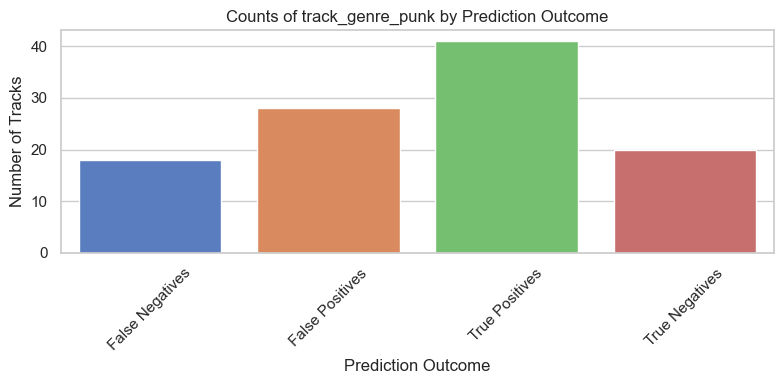

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


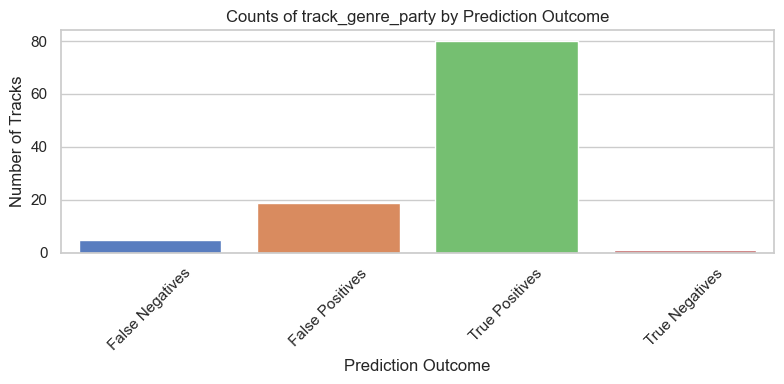

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


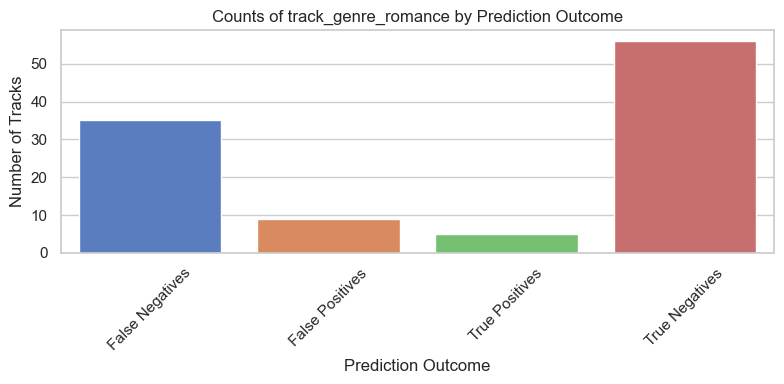

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


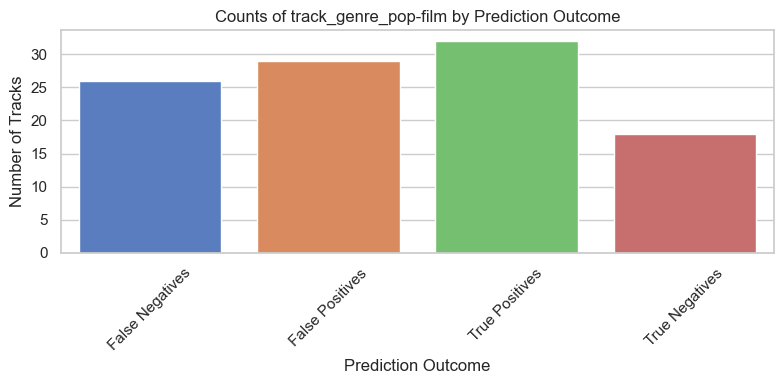

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


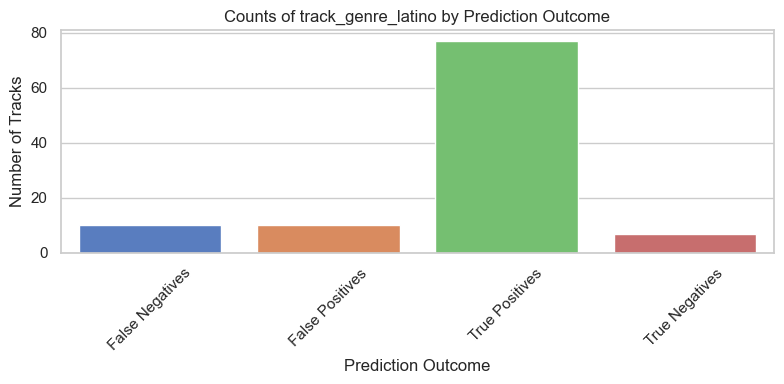

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


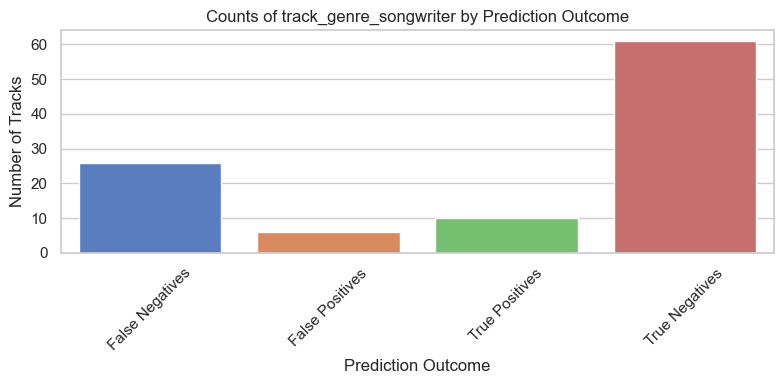

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


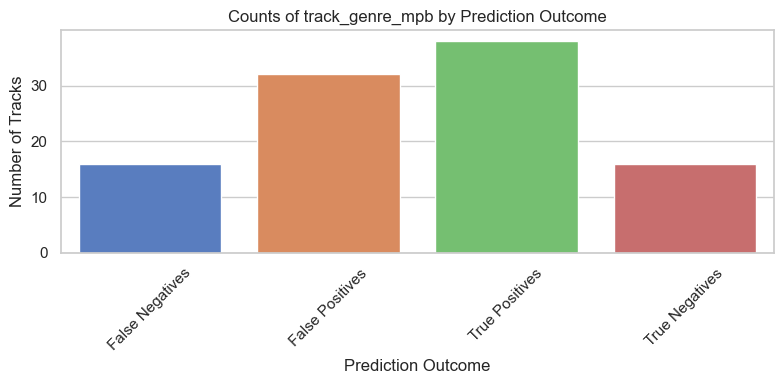

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


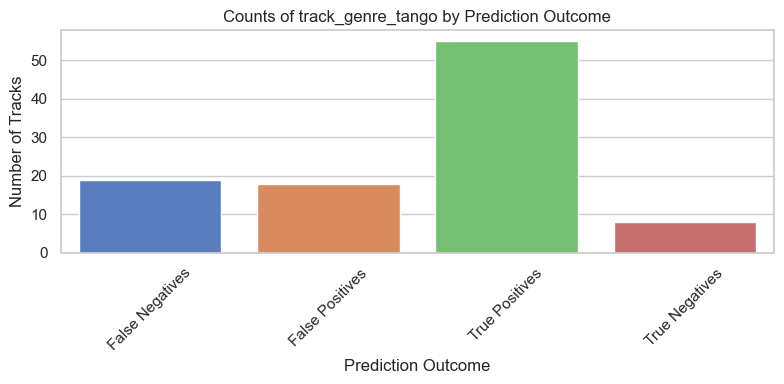

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


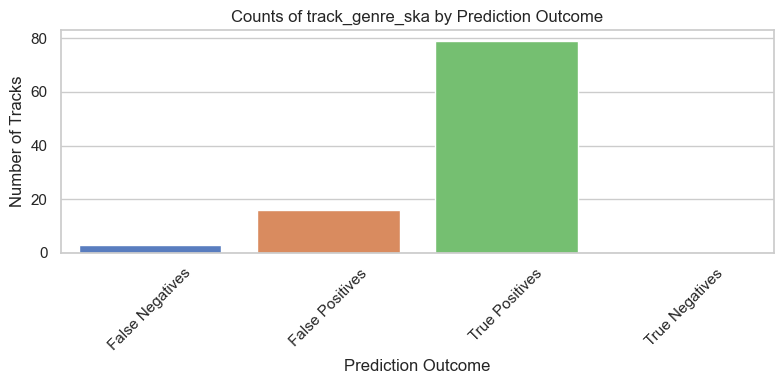

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


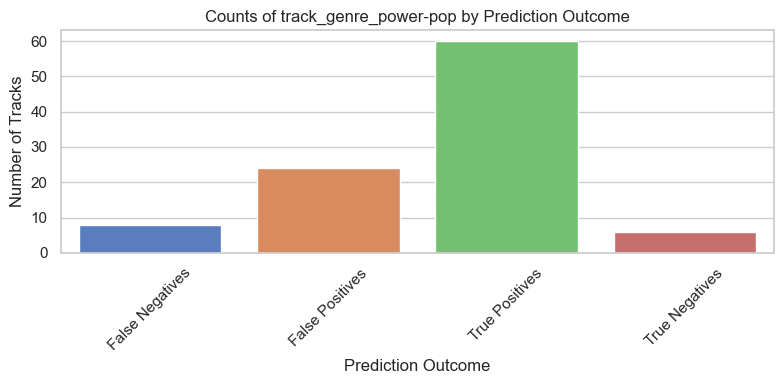

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


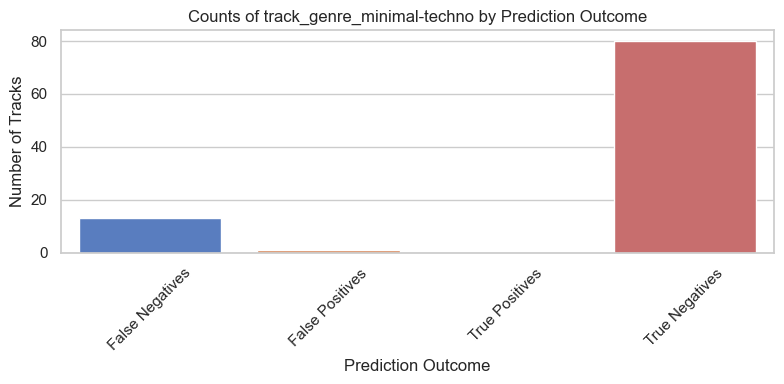

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


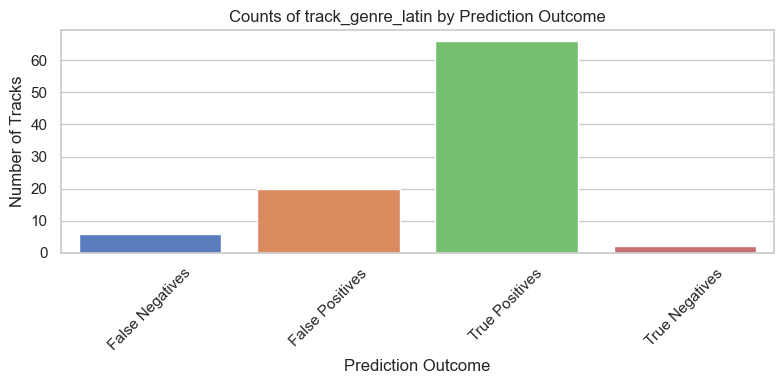

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


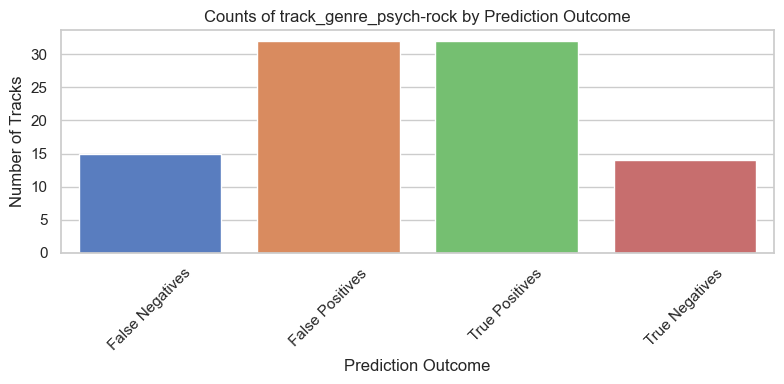

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


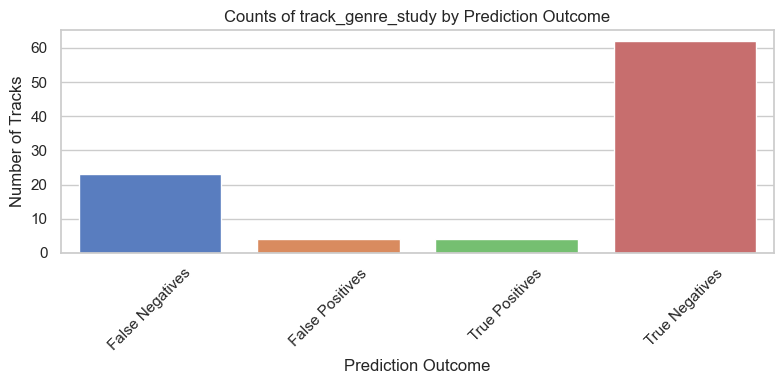

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


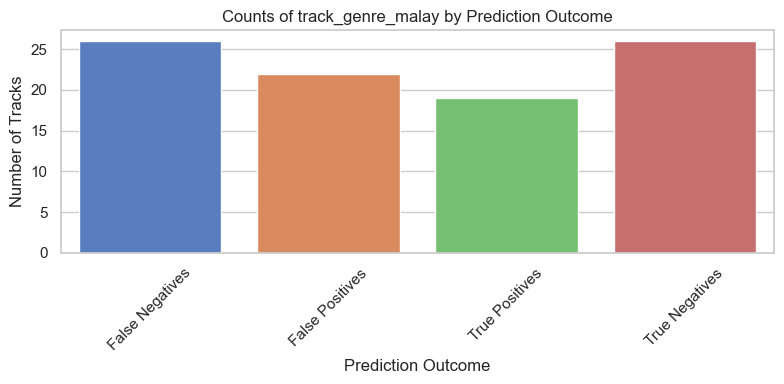

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


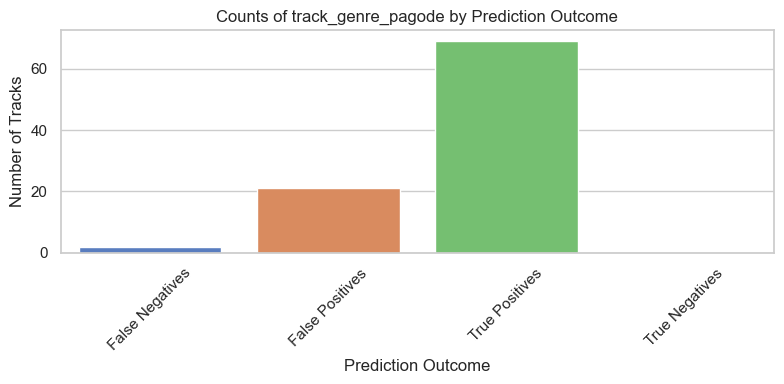

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


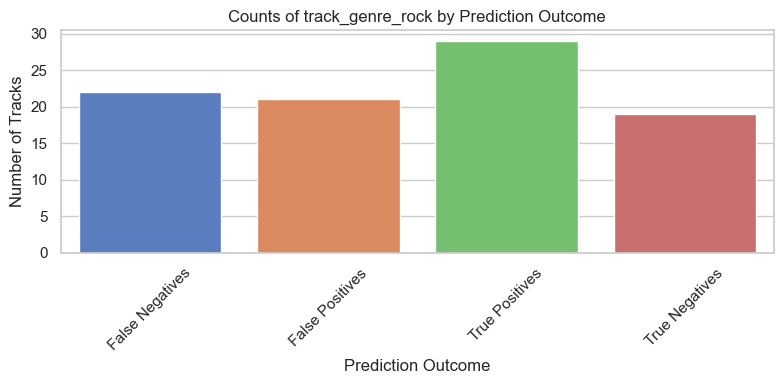

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


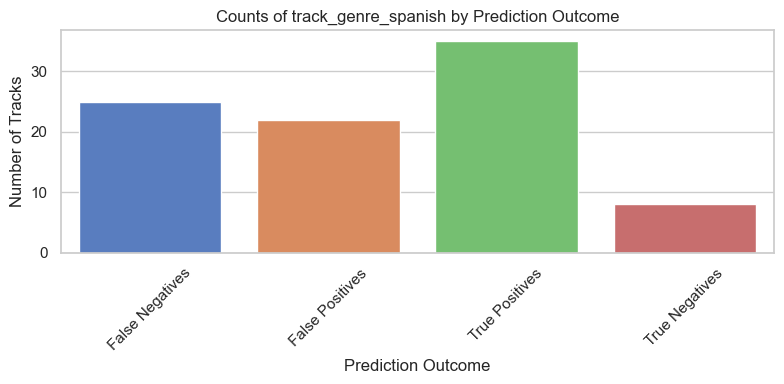

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


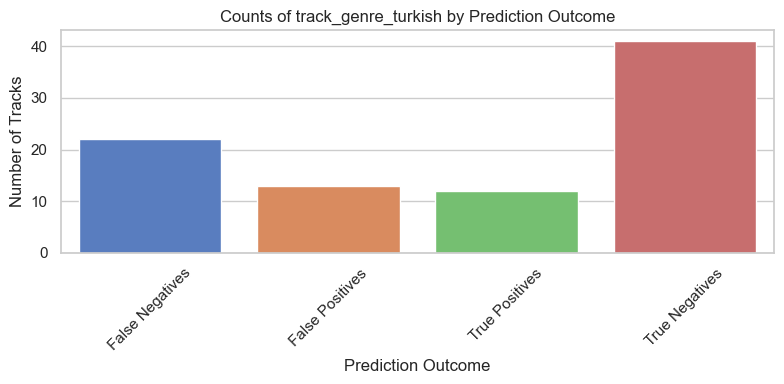

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


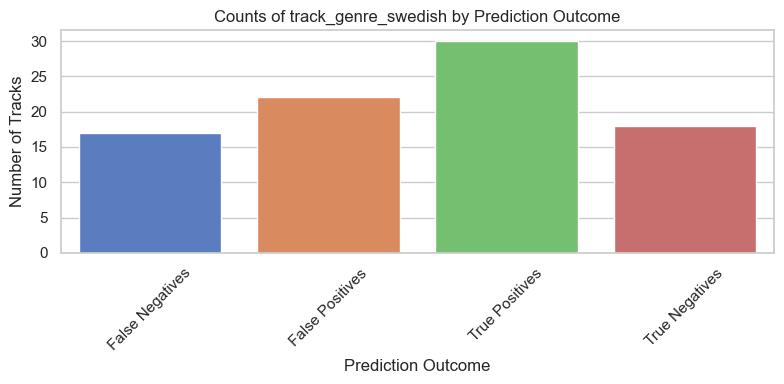

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


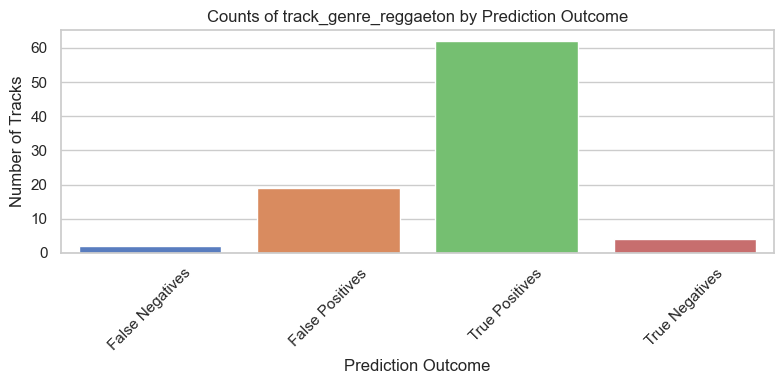

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


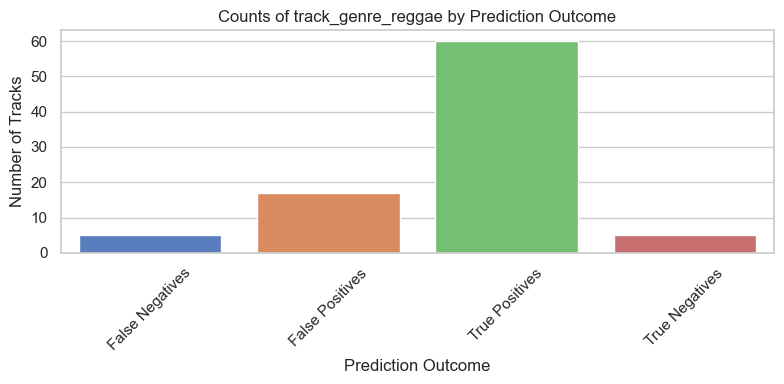

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


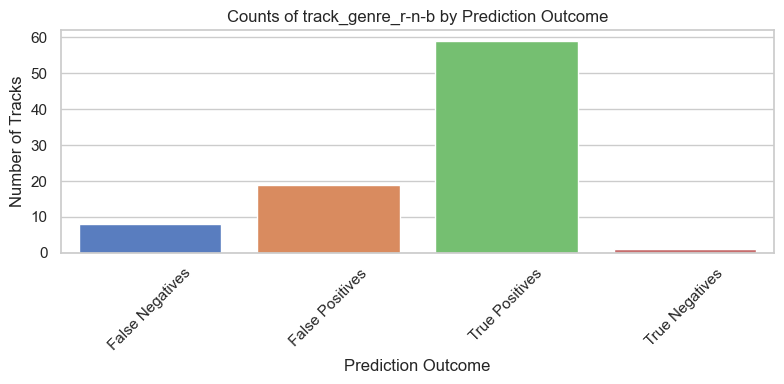

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


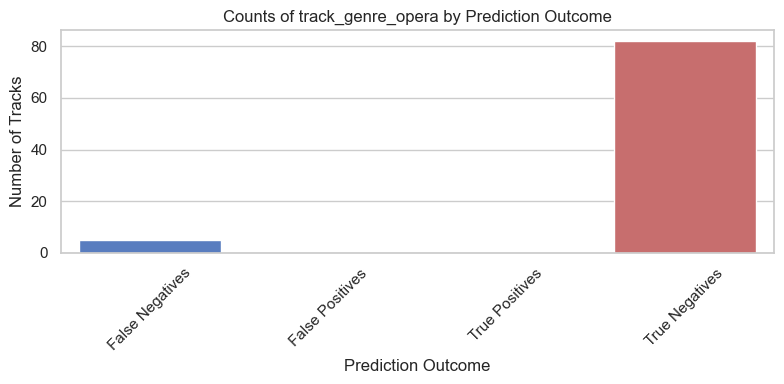

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


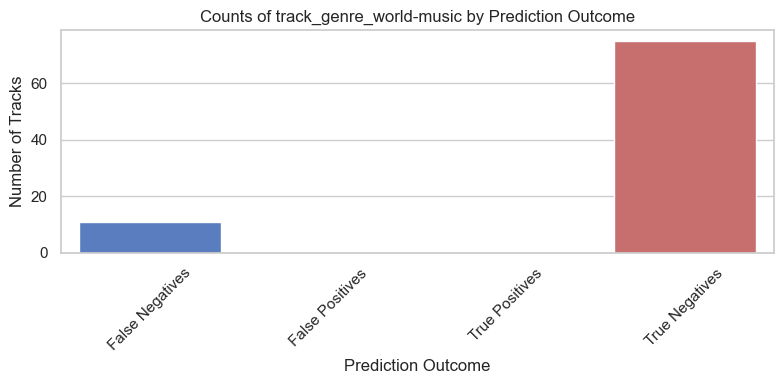

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


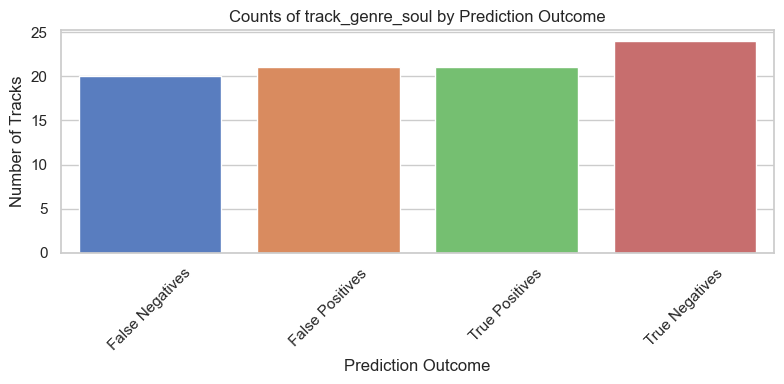

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


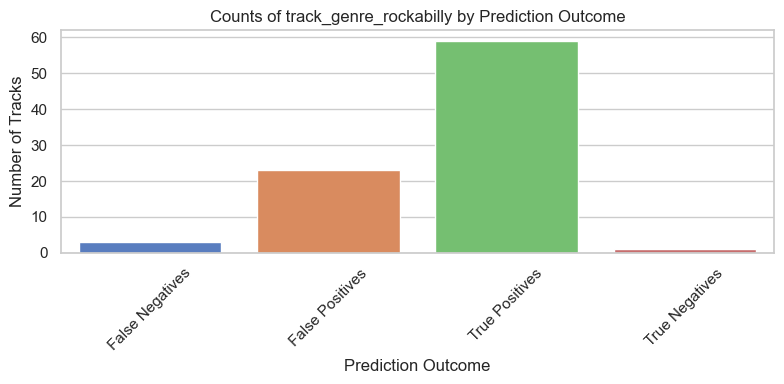

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


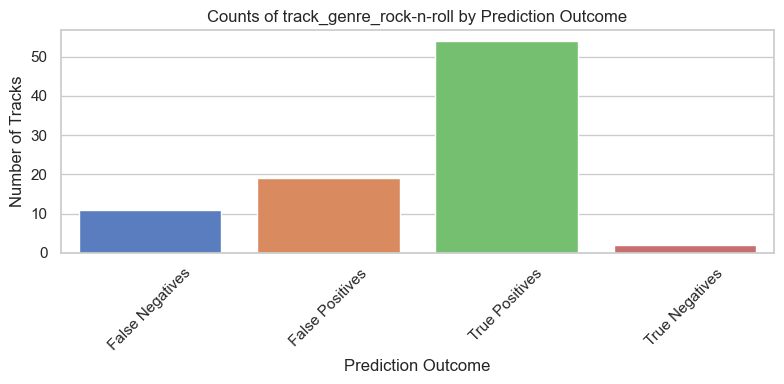

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


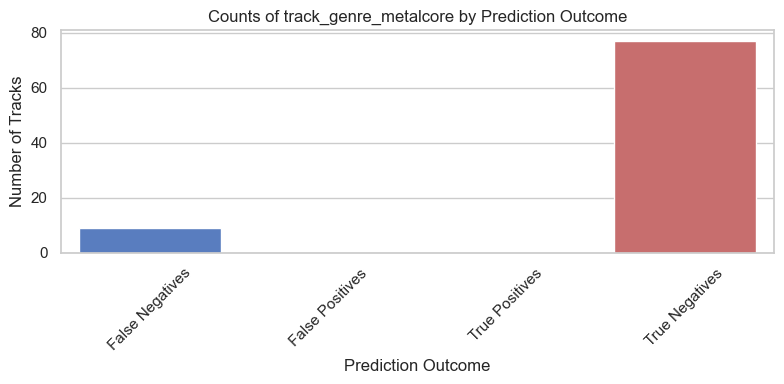

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


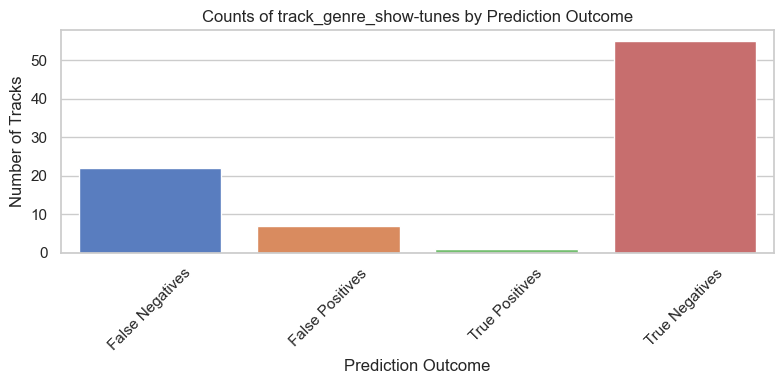

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


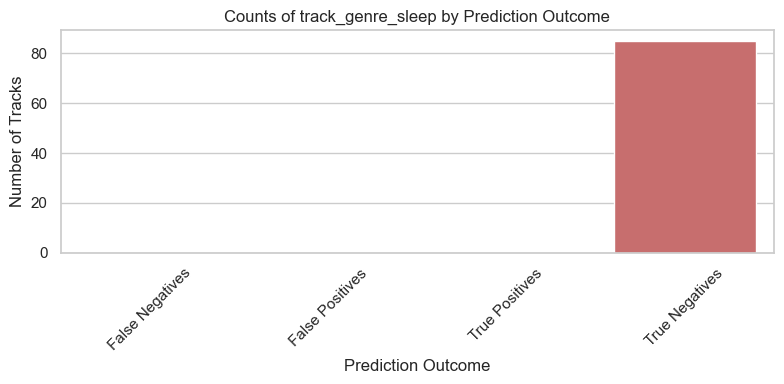

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


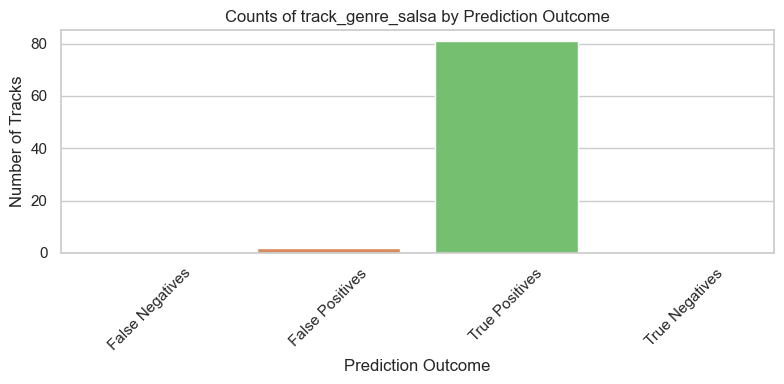

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


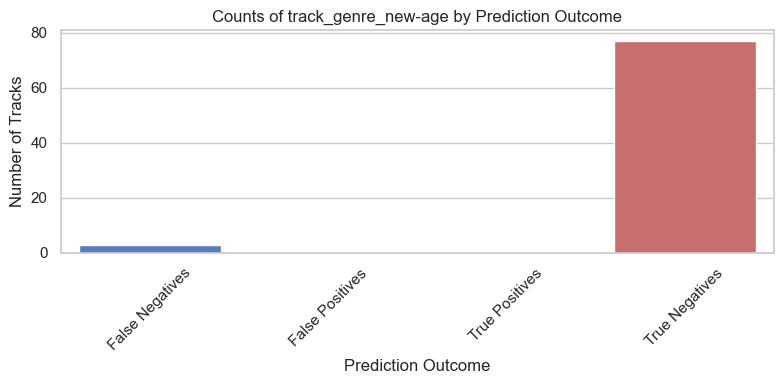

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


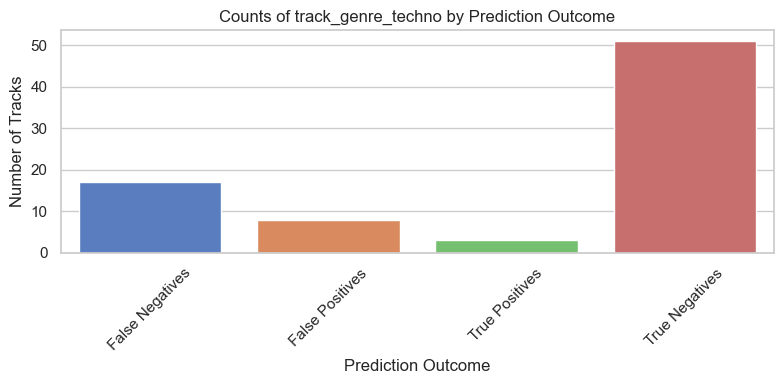

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


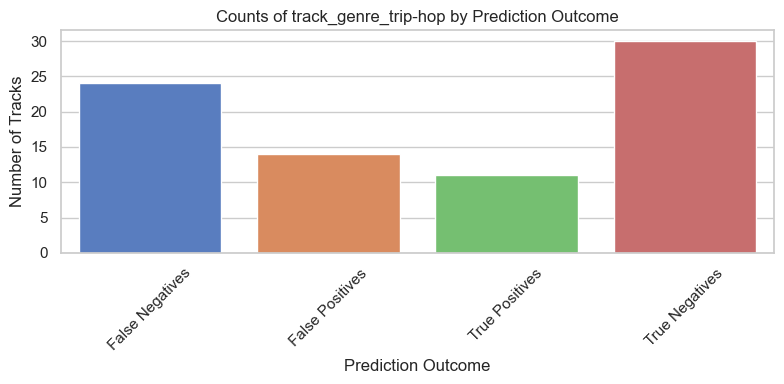

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


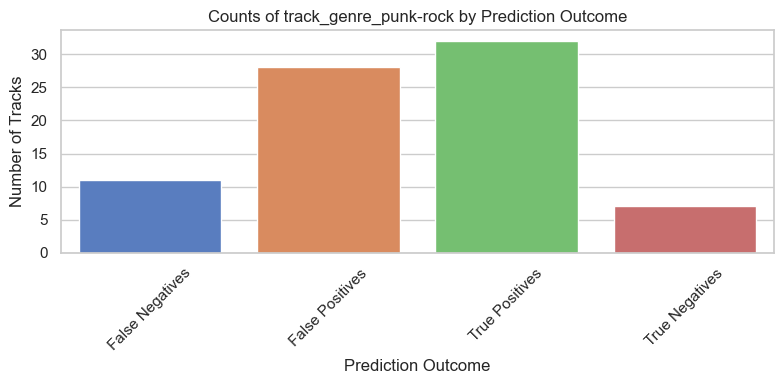

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


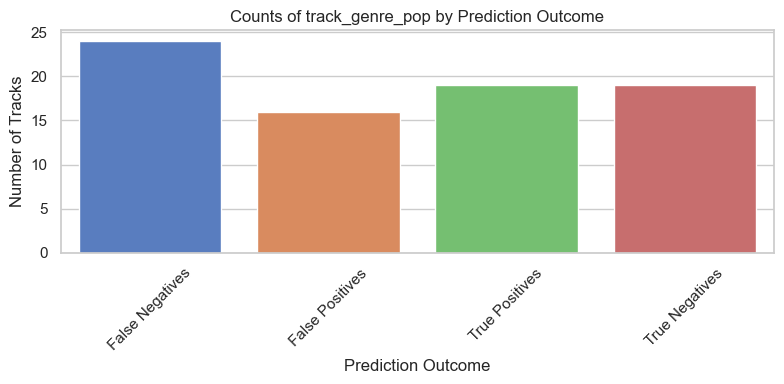

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


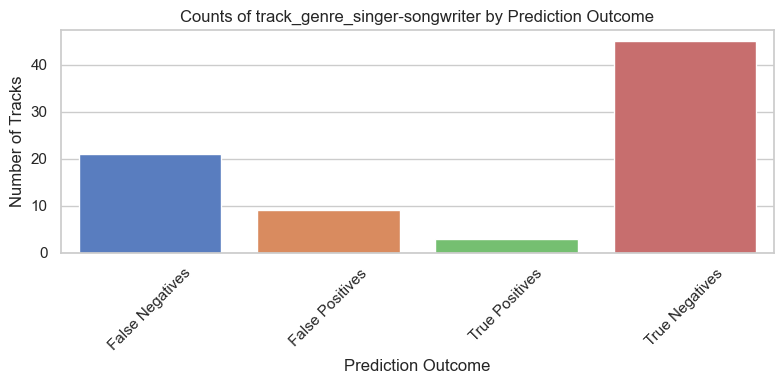

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


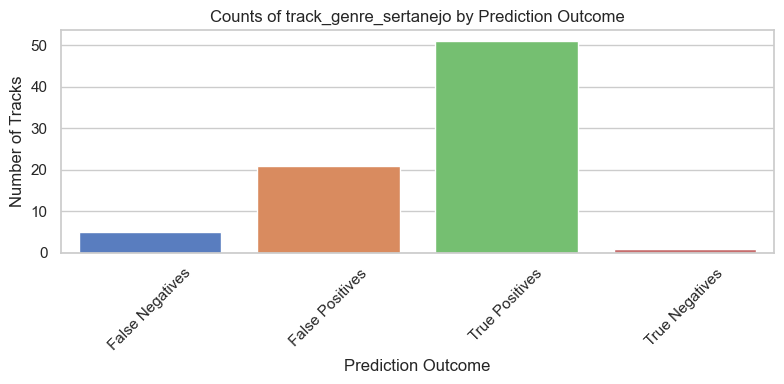

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


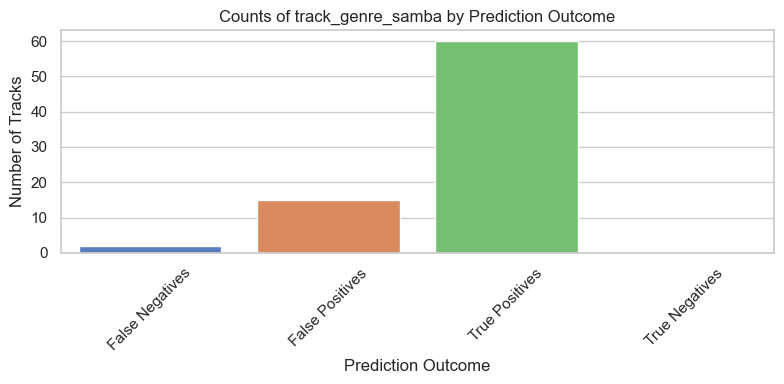

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


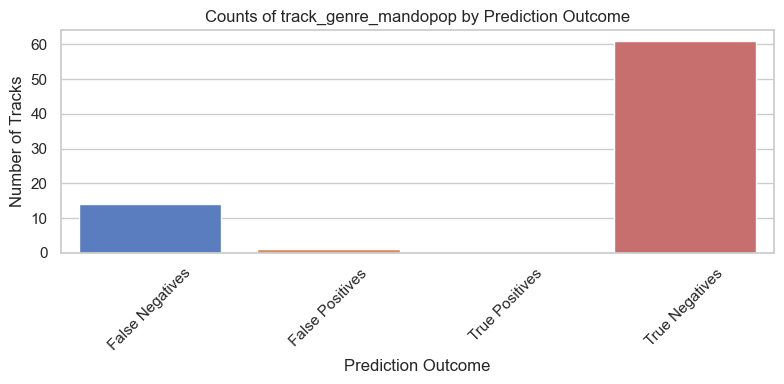

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


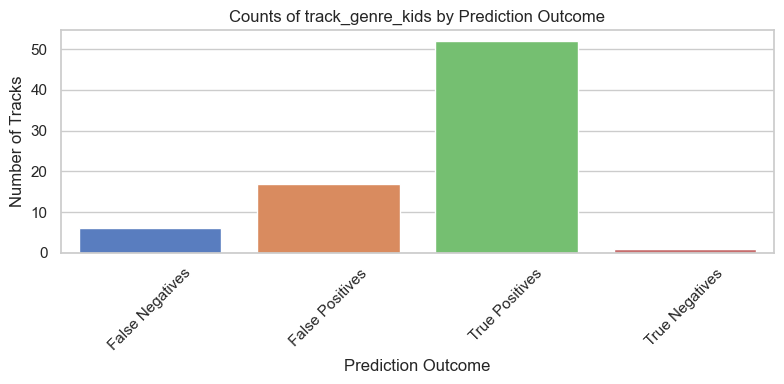

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


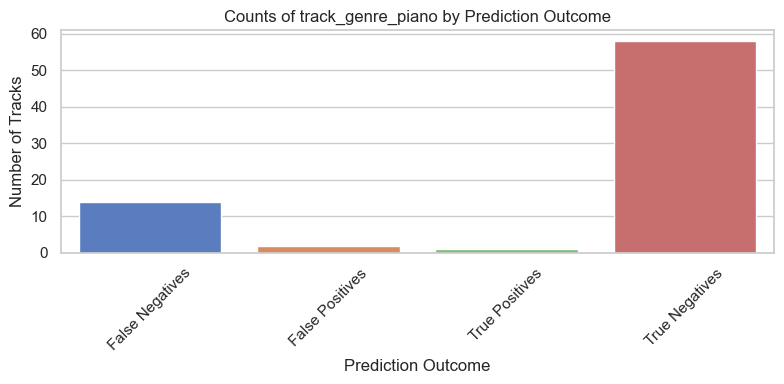

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


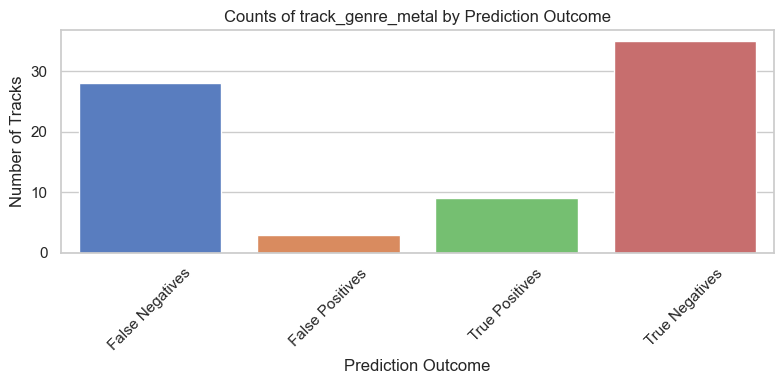

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


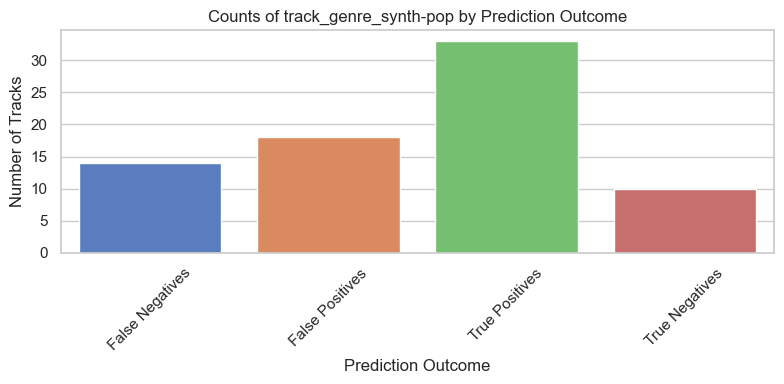

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


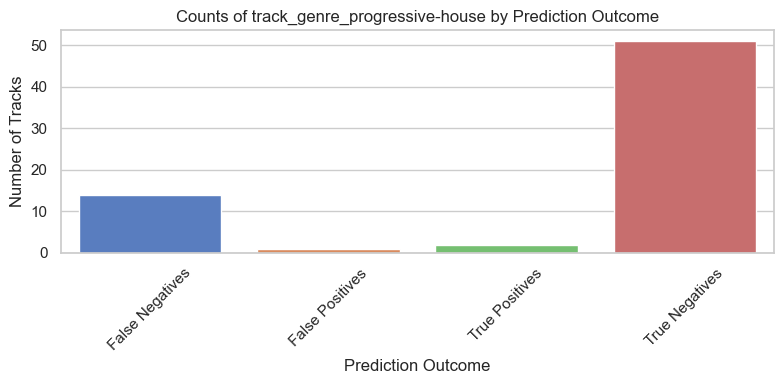

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


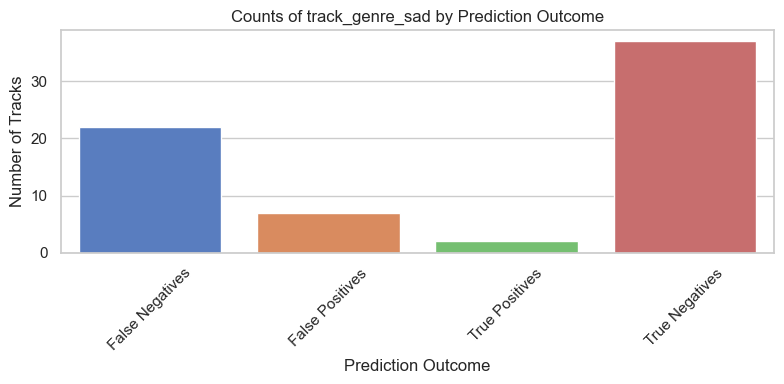

C:\Users\brand\AppData\Local\Temp\ipykernel_39240\16305665.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


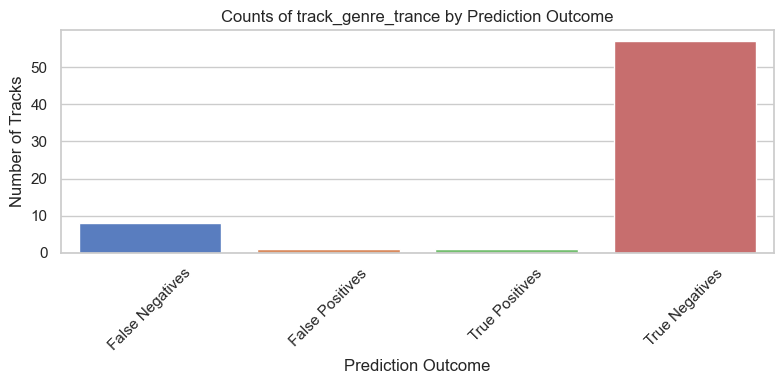

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# --- Genre Counts per Prediction Outcome ---

# Ensure genre columns are all 0 or 1
genre_cols = [col for col in df.columns if col.startswith("track_genre")]

# If genre values are probabilities or standardized, convert to binary
for col in genre_cols:
    df[col] = (df[col] > 0.5).astype(int)  # Adjust threshold if needed
    # df[col].apply(pd.Series.unique)

# Define the prediction outcome groups
groups = {
    "False Negatives": false_negatives,
    "False Positives": false_positives,
    "True Positives": true_positives,
    "True Negatives": true_negatives,
}

# Count genres per group
genre_counts = {
    # group_name: group_df[genre_cols].clip(lower=0).sum() for group_name, group_df in groups.items()
    group_name: (group_df[genre_cols] > 0).astype(int).sum() for group_name, group_df in groups.items()
}

# genre_matrix = (df[genre_cols] != -0.09407250308929431).astype(int)
# print(genre_matrix)

# Create a DataFrame
genre_counts_df = pd.DataFrame(genre_counts).T  # Outcomes as rows
# genre_counts_df.to_csv('output.csv', index=False)

top_genres = genre_counts_df.sum(axis=0).sort_values(ascending=False).index
# top_genres = genre_counts_df.sum(axis=0).sort_values(ascending=False).head(20).index

# Plot barplot for each genre
# for genre in genre_counts_df.columns:
for genre in top_genres:
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=genre_counts_df.index,
        y=genre_counts_df[genre].values,
        palette="muted",
    )
    plt.title(f"Counts of {genre} by Prediction Outcome")
    plt.ylabel("Number of Tracks")
    plt.xlabel("Prediction Outcome")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [180]:
# Count of genres in true positives
# print(true_negatives.columns.values)
# genre_columns = [col for col in df.columns if col.startswith("track_genre_")]
# print(genre_columns)

# # Step 2: Use idxmax to get the column name with value 1
# df["track_genre"] = df[genre_columns].idxmax(axis=1)

# # Step 3: Remove the "track_genre_" prefix
# df["track_genre"] = df["track_genre"].str.replace("track_genre_", "")

# # Optional: Drop one-hot columns
# df = df.drop(columns=genre_columns)

# mood_counts_by_genre = (
#     df.groupby("track_genre")["valence"].value_counts().unstack().fillna(0)
# )
# true_negatives.to_csv("true_negatives.csv", index=False)

In [181]:
# Count of genres in true positives
# print(true_negatives.columns.values)
# genre_columns = [col for col in df.columns if col.startswith("track_genre_")]
# print(genre_columns)

# # Step 2: Use idxmax to get the column name with value 1
# df["track_genre"] = df[genre_columns].idxmax(axis=1)

# # Step 3: Remove the "track_genre_" prefix
# df["track_genre"] = df["track_genre"].str.replace("track_genre_", "")

# # Optional: Drop one-hot columns
# df = df.drop(columns=genre_columns)

# mood_counts_by_genre = (
#     df.groupby("track_genre")["valence"].value_counts().unstack().fillna(0)
# )
# true_negatives.to_csv("true_negatives.csv", index=False)

In [182]:
# sns.set(style="whitegrid")
# plt.rcParams["figure.figsize"] = (10, 5)

# # df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

# # Features only (adjust as needed)
# feature_cols = [
#     col
#     for col in df.columns
#     if col
#     not in [
#         "target_actual",
#         "target_pred",
#         "track_id",
#         "artists",
#         "album_name",
#         "track_name",
#         "valence",
#     ]
# ]

# print(feature_cols)

# # Mean summary per category
# summary_df = pd.DataFrame(
#     {
#         "False Negatives": false_negatives[feature_cols].mean(),
#         "False Positives": false_positives[feature_cols].mean(),
#         "True Positives": true_positives[feature_cols].mean(),
#         "True Negatives": true_negatives[feature_cols].mean(),
#         # "All Data": df[feature_cols].mean(),
#     }
# )

# # Transpose for easier plotting
# summary_df = summary_df.T

# # Optional: Normalize columns for radar/spider-style plots
# summary_norm = (summary_df - summary_df.min()) / (summary_df.max() - summary_df.min())


# # --- Comparison Bar Plot for of each genre  ---
# # Choose top 10 most differing features that are ONLY GENRES (by std deviation across groups)
# top_diff_features = (
#     summary_df.filter(like="track_genre")
#     .std()
#     .sort_values(ascending=False)
#     # .head(10)
#     .index
# )


# for feature in top_diff_features:
#     summary_df[feature].plot(
#         kind="bar", title=f"{feature} across Prediction Groups", ylabel="Mean Value"
#     )
#     plt.xticks(rotation=45)
#     plt.grid(axis="y")
#     plt.tight_layout()
#     plt.show()

# # --- Radar Plot (optional, fancier) ---
# try:
#     from math import pi

#     categories = list(summary_norm.columns)
#     groups = summary_norm.index

#     for group in groups:
#         values = summary_norm.loc[group].tolist()
#         values += values[:1]  # repeat the first value to close the circle

#         angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
#         angles += angles[:1]

#         plt.figure(figsize=(6, 6))
#         ax = plt.subplot(111, polar=True)
#         plt.xticks(angles[:-1], categories, color="grey", size=8)

#         ax.plot(angles, values, linewidth=2, linestyle="solid", label=group)
#         ax.fill(angles, values, alpha=0.2)

#         plt.title(f"Radar Plot for {group}", size=14, y=1.1)
#         plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
#         plt.tight_layout()
#         plt.show()
# except ImportError:
#     print("Radar plot skipped (requires polar plotting support).")

Using K-Nearest Neighbors with audio features to predict song valence, our model achieved a classification accuracy of 73.6%. The model performs slightly better at identifying low-valence (sadder) songs, with higher recall (79%) compared to high-valence (happier) songs (67%). Precision is fairly balanced across both classes. The findings suggest that features like danceability, energy, and acousticness have predictive value for estimating a song’s mood, but future work could explore better handling of class imbalance or using more sophisticated models to improve recall for high-valence tracks.